In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Устанавливаем правильную рабочую директорию
os.chdir('/home/sasamb4ikk/Documents/impl_LSPI/AmericanOptionsPricingApproaches')

# Отладочный вывод
print("Текущая рабочая директория:", os.getcwd())

# Путь к src находится в текущей директории
project_root = os.path.abspath(os.getcwd())  # Текущая директория
src_path = os.path.join(project_root, 'src')
print("Путь к src:", src_path)
print("Существует ли src?:", os.path.exists(src_path))
sys.path.append(src_path)
print("sys.path:", sys.path)

# Импорты
from samplers.geometric_brownian_motion_put_sampler import GeometricBrownianMotionPutSampler
from samplers.wiener_rainbow_put_option_sampler import WienerRainbowPutOptionSampler
from pricers.american_monte_carlo import AmericanMonteCarloPricer
from pricers.binomial_tree import BinomialTreePricer
from pricers.lspi import LSPIPricer

# Ваш дальнейший код...

Текущая рабочая директория: /home/sasamb4ikk/Documents/impl_LSPI/AmericanOptionsPricingApproaches
Путь к src: /home/sasamb4ikk/Documents/impl_LSPI/AmericanOptionsPricingApproaches/src
Существует ли src?: True
sys.path: ['/home/sasamb4ikk/anaconda3/lib/python311.zip', '/home/sasamb4ikk/anaconda3/lib/python3.11', '/home/sasamb4ikk/anaconda3/lib/python3.11/lib-dynload', '', '/home/sasamb4ikk/anaconda3/lib/python3.11/site-packages', '/home/sasamb4ikk/Documents/impl_LSPI/AmericanOptionsPricingApproaches/src']


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.run.run_pricing import run_pricing_multiple_times

In [4]:
run_pricing_multiple_times(test=True, quiet=True);

Pricing trajectories:   0%|          | 0/10 [00:00<?, ?it/s]

Pricing 1000 / 100000 (0 / 10)


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

Pricing 12000 / 100000 (1 / 10)


AMC price test: 100%|██████████| 364/364 [00:00<00:00, 948.69it/s]


Pricing 23000 / 100000 (2 / 10)


AMC price test: 100%|██████████| 364/364 [00:00<00:00, 671.02it/s]


Pricing 34000 / 100000 (3 / 10)


AMC price test: 100%|██████████| 364/364 [00:00<00:00, 465.29it/s]


Pricing 45000 / 100000 (4 / 10)


AMC price test: 100%|██████████| 364/364 [00:01<00:00, 319.33it/s]


Pricing 56000 / 100000 (5 / 10)


AMC price test: 100%|██████████| 364/364 [00:01<00:00, 250.98it/s]


Pricing 67000 / 100000 (6 / 10)


GBM sampling: 100%|██████████| 364/364 [00:01<00:00, 280.08it/s]

AMC price test: 100%|██████████| 364/364 [00:01<00:00, 192.59it/s]


Pricing 78000 / 100000 (7 / 10)


AMC price test: 100%|██████████| 364/364 [00:02<00:00, 164.53it/s]


Pricing 89000 / 100000 (8 / 10)


AMC price test: 100%|██████████| 364/364 [00:02<00:00, 139.51it/s]


Pricing 100000 / 100000 (9 / 10)


GBM sampling: 100%|██████████| 364/364 [00:02<00:00, 159.86it/s]

AMC price test: 100%|██████████| 364/364 [00:02<00:00, 122.95it/s]


In [11]:
import pickle 
with open("saves/pricing/GeometricBrownianMotionPutSampler_AmericanMonteCarloPricer_10x24.pkl", "rb") as f:
    train_prices, test_prices, cnt_trajectories = pickle.load(f)

In [12]:
train_prices.shape

(24, 10)

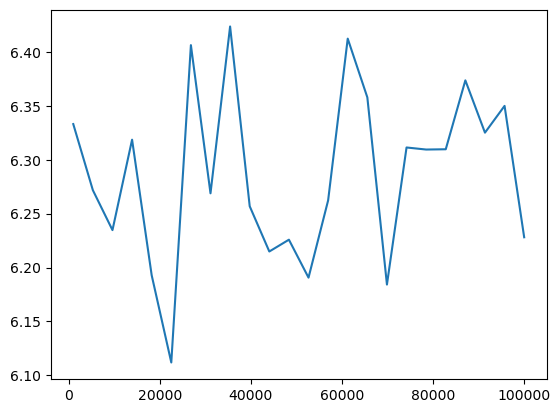

In [13]:
import matplotlib.pyplot as plt
plt.plot(cnt_trajectories, train_prices.mean(axis=1))

# старые отрисовки

In [1]:
import numpy as np

# Пример: 1000 траекторий, 50 моментов времени, 3 актива
num_paths, num_times, d = 1000, 50, 3
S = np.random.rand(num_paths, num_times, d)  # случайные цены
K = 1.0  # страйк

min_S = np.min(S, axis=2)  # минимум по активам
M = min_S / K  # нормализация

print(min_S.shape)  # (1000, 50)
print(M.shape)      # (1000, 50)

(1000, 50)
(1000, 50)


In [3]:
min_S

array([[0.05956871, 0.49625995, 0.07597211, ..., 0.09076812, 0.12761278,
        0.03529936],
       [0.14088064, 0.23311629, 0.34527401, ..., 0.74109362, 0.14110529,
        0.0533414 ],
       [0.11079927, 0.466101  , 0.16703374, ..., 0.39833801, 0.1278648 ,
        0.0287637 ],
       ...,
       [0.23185424, 0.06258961, 0.02627294, ..., 0.09445658, 0.2434709 ,
        0.21395428],
       [0.07329894, 0.36710959, 0.19915678, ..., 0.19790246, 0.48191368,
        0.09353013],
       [0.11915574, 0.25722302, 0.05335934, ..., 0.06426643, 0.78010993,
        0.14808536]])

In [13]:
S.shape

(1000, 50, 3)

In [11]:
a = np.random.randint(1000, 5000, size = (3, 2, 1))

In [12]:
a.ndim

3

# протестируем для одномерного случая (то же, что и было раньше)

In [14]:
def evaluate_pricer_with_std(sampler_class, pricer_class, cnt_traj_list, num_repeats=5, **option_params):
    mean_prices = []
    std_prices = []
    
    for cnt_traj in cnt_traj_list:
        sampler = sampler_class(cnt_trajectories=cnt_traj, **option_params)
        pricer = pricer_class(sampler=sampler)
        prices = []
        
        for _ in range(num_repeats):
            pricer.price(test=False)
            pv_payoffs = pricer.price(test=True)
            price = np.mean(pv_payoffs)
            prices.append(price)
        
        mean_price = np.mean(prices)
        std_price = np.std(prices)
        mean_prices.append(mean_price)
        std_prices.append(std_price)
        print(f"cnt_traj: {cnt_traj}, mean_price: {mean_price}, std_price: {std_price}")
    
    return mean_prices, std_prices

In [15]:
def plot_prices_with_std(cnt_traj_list, mean_prices, std_prices, label='LSPI', reference_price=None):
    plt.figure(figsize=(10, 6))
    plt.plot(cnt_traj_list, mean_prices, label=f'{label} средняя цена')
    plt.fill_between(cnt_traj_list,
                     np.array(mean_prices) - np.array(std_prices),
                     np.array(mean_prices) + np.array(std_prices),
                     alpha=0.3, label=f'{label} стандартное отклонение')
    if reference_price is not None:
        plt.axhline(y=reference_price, color='r', linestyle='--', label='Биномиальная модель')
    plt.xlabel('Количество траекторий')
    plt.ylabel('Цена опциона')
    plt.title('Сходимость цены опциона с учетом стандартного отклонения')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_std_only(cnt_traj_list, std_prices, label='LSPI'):
    plt.figure(figsize=(10, 6))
    plt.plot(cnt_traj_list, std_prices, label=f'{label} стандартное отклонение', color='orange')
    plt.xlabel('Количество траекторий')
    plt.ylabel('Стандартное отклонение цены опциона')
    plt.title('Зависимость стандартного отклонения от количества траекторий')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
option_params = {
    "asset0": 100.0,
    "sigma": 0.2,
    "r": 0.05,
    "strike": 100.0,
    "t": 1.0,
    "cnt_times": 365,
    "seed": None
}

In [6]:
binomial_params = option_params.copy()
binomial_params["cnt_trajectories"] = 1  # Для BinomialTreePricer cnt_trajectories не влияет, но требуется
binomial_sampler = GeometricBrownianMotionPutSampler(**binomial_params)
binomial_pricer = BinomialTreePricer(sampler=binomial_sampler)
binomial_price, _ = binomial_pricer.price(quiet=True)
print(f"Биномиальная цена: {binomial_price}")

Биномиальная цена: 6.093910298972092


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 543.9568
на 1-ой итерации норма разности весов составила 1217.5526
на 2-ой итерации норма разности весов составила 489.1809
на 3-ой итерации норма разности весов составила 145.0345
на 4-ой итерации норма разности весов составила 15.5579
на 5-ой итерации норма разности весов составила 3.4696
на 6-ой итерации норма разности весов составила 4.2648
на 7-ой итерации норма разности весов составила 5.1289
на 8-ой итерации норма разности весов составила 1.01
на 9-ой итерации норма разности весов составила 0.0587
на 10-ой итерации норма разности весов составила 0.0002
на 11-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 42.2434
на 1-ой итерации норма разности весов составила 26.5015
на 2-ой итерации норма разности весов составила 32.0047
на 3-ой итерации норма разности весов составила 2.8951
на 4-ой итерации норма разности весов составила 1.3785
на 5-ой итерации норма разности весов составила 2.7028
на 6-ой итерации норма разности весов составила 0.3986
на 7-ой итерации норма разности весов составила 0.0009
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 24.6866
на 1-ой итерации норма разности весов составила 4.2528
на 2-ой итерации норма разности весов составила 1.6264
на 3-ой итерации норма разности весов составила 1.5911
на 4-ой итерации норма разности весов составила 0.1298
на 5-ой итерации норма разности весов составила 0.0003
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 16.696
на 1-ой итерации норма разности весов составила 11.4893
на 2-ой итерации норма разности весов составила 14.1304
на 3-ой итерации норма разности весов составила 0.8965
на 4-ой итерации норма разности весов составила 1.4817
на 5-ой итерации норма разности весов составила 0.8647
на 6-ой итерации норма разности весов составила 0.0076
на 7-ой итерации норма разности весов составила 0.0001
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.6452
на 1-ой итерации норма разности весов составила 25.5371
на 2-ой итерации норма разности весов составила 3.1132
на 3-ой итерации норма разности весов составила 3.261
на 4-ой итерации норма разности весов составила 2.7826
на 5-ой итерации норма разности весов составила 0.2009
на 6-ой итерации норма разности весов составила 0.0004
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 1000, mean_price: 5.8210, std_price: 0.4406


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 709.6347
на 1-ой итерации норма разности весов составила 1569.7986
на 2-ой итерации норма разности весов составила 219.1549
на 3-ой итерации норма разности весов составила 222.3505
на 4-ой итерации норма разности весов составила 286.0848
на 5-ой итерации норма разности весов составила 26.0104
на 6-ой итерации норма разности весов составила 8.5038
на 7-ой итерации норма разности весов составила 1.9499
на 8-ой итерации норма разности весов составила 1.4797
на 9-ой итерации норма разности весов составила 0.2793
на 10-ой итерации норма разности весов составила 0.0158
на 11-ой итерации норма разности весов составила 0.0007
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0
на 15-ой итерации норма разности весов составила 0.0
на 16-ой итерации норма разности весов составила 0.0
на 17-ой итерации норма разности весов составила 0.0
на 18-ой

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 35.7831
на 1-ой итерации норма разности весов составила 15.9598
на 2-ой итерации норма разности весов составила 2.7858
на 3-ой итерации норма разности весов составила 2.862
на 4-ой итерации норма разности весов составила 0.4376
на 5-ой итерации норма разности весов составила 0.0003
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.226
на 1-ой итерации норма разности весов составила 2.5808
на 2-ой итерации норма разности весов составила 0.0746
на 3-ой итерации норма разности весов составила 0.0001
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.2774
на 1-ой итерации норма разности весов составила 19.913
на 2-ой итерации норма разности весов составила 26.4794
на 3-ой итерации норма разности весов составила 0.9061
на 4-ой итерации норма разности весов составила 1.2913
на 5-ой итерации норма разности весов составила 0.3985
на 6-ой итерации норма разности весов составила 0.0074
на 7-ой итерации норма разности весов составила 0.0001
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.3322
на 1-ой итерации норма разности весов составила 0.3521
на 2-ой итерации норма разности весов составила 1.1289
на 3-ой итерации норма разности весов составила 3.0536
на 4-ой итерации норма разности весов составила 0.4721
на 5-ой итерации норма разности весов составила 0.0012
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 2000, mean_price: 5.8607, std_price: 0.2580


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 807.1847
на 1-ой итерации норма разности весов составила 1685.5202
на 2-ой итерации норма разности весов составила 247.426
на 3-ой итерации норма разности весов составила 197.6515
на 4-ой итерации норма разности весов составила 172.8411
на 5-ой итерации норма разности весов составила 126.767
на 6-ой итерации норма разности весов составила 11.3825
на 7-ой итерации норма разности весов составила 2.2741
на 8-ой итерации норма разности весов составила 6.0254
на 9-ой итерации норма разности весов составила 1.4826
на 10-ой итерации норма разности весов составила 0.011
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.8797
на 1-ой итерации норма разности весов составила 23.0821
на 2-ой итерации норма разности весов составила 33.2935
на 3-ой итерации норма разности весов составила 0.4585
на 4-ой итерации норма разности весов составила 2.6118
на 5-ой итерации норма разности весов составила 1.6109
на 6-ой итерации норма разности весов составила 0.0687
на 7-ой итерации норма разности весов составила 0.0001
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 20.8477
на 1-ой итерации норма разности весов составила 8.7824
на 2-ой итерации норма разности весов составила 3.9173
на 3-ой итерации норма разности весов составила 0.6591
на 4-ой итерации норма разности весов составила 0.0219
на 5-ой итерации норма разности весов составила 0.0003
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 27.0551
на 1-ой итерации норма разности весов составила 0.5785
на 2-ой итерации норма разности весов составила 0.0301
на 3-ой итерации норма разности весов составила 0.0007
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 15.2181
на 1-ой итерации норма разности весов составила 0.8111
на 2-ой итерации норма разности весов составила 1.0698
на 3-ой итерации норма разности весов составила 0.3837
на 4-ой итерации норма разности весов составила 0.0085
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 3000, mean_price: 5.8588, std_price: 0.2208


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 802.5997
на 1-ой итерации норма разности весов составила 1736.5196
на 2-ой итерации норма разности весов составила 297.5799
на 3-ой итерации норма разности весов составила 182.6252
на 4-ой итерации норма разности весов составила 160.0274
на 5-ой итерации норма разности весов составила 135.267
на 6-ой итерации норма разности весов составила 10.403
на 7-ой итерации норма разности весов составила 2.4826
на 8-ой итерации норма разности весов составила 3.8417
на 9-ой итерации норма разности весов составила 1.4848
на 10-ой итерации норма разности весов составила 0.0518
на 11-ой итерации норма разности весов составила 0.0002
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.1447
на 1-ой итерации норма разности весов составила 6.6568
на 2-ой итерации норма разности весов составила 0.7959
на 3-ой итерации норма разности весов составила 0.0832
на 4-ой итерации норма разности весов составила 0.001
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 17.8106
на 1-ой итерации норма разности весов составила 3.3444
на 2-ой итерации норма разности весов составила 1.2944
на 3-ой итерации норма разности весов составила 1.081
на 4-ой итерации норма разности весов составила 0.3383
на 5-ой итерации норма разности весов составила 0.0016
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 21.4135
на 1-ой итерации норма разности весов составила 0.2575
на 2-ой итерации норма разности весов составила 0.8978
на 3-ой итерации норма разности весов составила 0.0387
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.1119
на 1-ой итерации норма разности весов составила 2.2769
на 2-ой итерации норма разности весов составила 2.4518
на 3-ой итерации норма разности весов составила 1.3013
на 4-ой итерации норма разности весов составила 1.1316
на 5-ой итерации норма разности весов составила 0.2875
на 6-ой итерации норма разности весов составила 0.001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 4000, mean_price: 6.0652, std_price: 0.1249


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 872.7434
на 1-ой итерации норма разности весов составила 1818.113
на 2-ой итерации норма разности весов составила 310.1808
на 3-ой итерации норма разности весов составила 182.5811
на 4-ой итерации норма разности весов составила 137.7136
на 5-ой итерации норма разности весов составила 118.6152
на 6-ой итерации норма разности весов составила 3.0326
на 7-ой итерации норма разности весов составила 2.4955
на 8-ой итерации норма разности весов составила 5.9969
на 9-ой итерации норма разности весов составила 2.0263
на 10-ой итерации норма разности весов составила 0.1103
на 11-ой итерации норма разности весов составила 0.0
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.4243
на 1-ой итерации норма разности весов составила 3.8818
на 2-ой итерации норма разности весов составила 0.4902
на 3-ой итерации норма разности весов составила 0.0471
на 4-ой итерации норма разности весов составила 0.0012
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.4785
на 1-ой итерации норма разности весов составила 2.0465
на 2-ой итерации норма разности весов составила 0.6851
на 3-ой итерации норма разности весов составила 0.332
на 4-ой итерации норма разности весов составила 0.0396
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.383
на 1-ой итерации норма разности весов составила 1.393
на 2-ой итерации норма разности весов составила 1.1737
на 3-ой итерации норма разности весов составила 0.4419
на 4-ой итерации норма разности весов составила 0.0635
на 5-ой итерации норма разности весов составила 0.0019
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.4543
на 1-ой итерации норма разности весов составила 0.2673
на 2-ой итерации норма разности весов составила 0.0016
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 5000, mean_price: 5.9370, std_price: 0.1477


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 850.6779
на 1-ой итерации норма разности весов составила 1843.0363
на 2-ой итерации норма разности весов составила 343.7688
на 3-ой итерации норма разности весов составила 175.3454
на 4-ой итерации норма разности весов составила 131.2183
на 5-ой итерации норма разности весов составила 109.3642
на 6-ой итерации норма разности весов составила 20.6021
на 7-ой итерации норма разности весов составила 8.5694
на 8-ой итерации норма разности весов составила 6.1912
на 9-ой итерации норма разности весов составила 1.3002
на 10-ой итерации норма разности весов составила 0.1511
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.6284
на 1-ой итерации норма разности весов составила 5.8259
на 2-ой итерации норма разности весов составила 2.9419
на 3-ой итерации норма разности весов составила 0.3126
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 18.5674
на 1-ой итерации норма разности весов составила 2.0486
на 2-ой итерации норма разности весов составила 0.1967
на 3-ой итерации норма разности весов составила 0.0009
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0
на 8-ой итерации норма разности весов составила 0.0
на 9-ой итерации норма разности весов составила 0.0
на 10-ой итерации норма разности весов составила 0.0
на 11-ой итерации норма разности весов составила 0.0
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0
на 15-ой итерации норма разности весов составила 0.0
на 16-ой итерации норма разности весов составила 0.0
на 17-ой итерации норма разности весов составила 0.0
на 18-ой итерации норма разности весов с

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 28.9969
на 1-ой итерации норма разности весов составила 10.4002
на 2-ой итерации норма разности весов составила 5.3875
на 3-ой итерации норма разности весов составила 3.0308
на 4-ой итерации норма разности весов составила 0.485
на 5-ой итерации норма разности весов составила 0.0502
на 6-ой итерации норма разности весов составила 0.0002
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.5333
на 1-ой итерации норма разности весов составила 1.7484
на 2-ой итерации норма разности весов составила 1.5776
на 3-ой итерации норма разности весов составила 0.8305
на 4-ой итерации норма разности весов составила 0.4118
на 5-ой итерации норма разности весов составила 0.0031
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 6000, mean_price: 5.8558, std_price: 0.3348


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 876.2605
на 1-ой итерации норма разности весов составила 1863.589
на 2-ой итерации норма разности весов составила 339.7724
на 3-ой итерации норма разности весов составила 171.4074
на 4-ой итерации норма разности весов составила 144.8474
на 5-ой итерации норма разности весов составила 83.1177
на 6-ой итерации норма разности весов составила 26.8612
на 7-ой итерации норма разности весов составила 8.1814
на 8-ой итерации норма разности весов составила 6.9137
на 9-ой итерации норма разности весов составила 1.2359
на 10-ой итерации норма разности весов составила 0.1476
на 11-ой итерации норма разности весов составила 0.0
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.8923
на 1-ой итерации норма разности весов составила 3.7013
на 2-ой итерации норма разности весов составила 0.691
на 3-ой итерации норма разности весов составила 0.1915
на 4-ой итерации норма разности весов составила 0.0006
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 29.2716
на 1-ой итерации норма разности весов составила 1.5951
на 2-ой итерации норма разности весов составила 0.048
на 3-ой итерации норма разности весов составила 0.0003
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.8962
на 1-ой итерации норма разности весов составила 0.5138
на 2-ой итерации норма разности весов составила 0.0963
на 3-ой итерации норма разности весов составила 0.0025
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 46.5696
на 1-ой итерации норма разности весов составила 25.1626
на 2-ой итерации норма разности весов составила 9.8607
на 3-ой итерации норма разности весов составила 4.1193
на 4-ой итерации норма разности весов составила 1.0454
на 5-ой итерации норма разности весов составила 0.0249
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 7000, mean_price: 5.9889, std_price: 0.1858


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 941.5841
на 1-ой итерации норма разности весов составила 1952.1246
на 2-ой итерации норма разности весов составила 287.99
на 3-ой итерации норма разности весов составила 208.7275
на 4-ой итерации норма разности весов составила 161.3775
на 5-ой итерации норма разности весов составила 136.771
на 6-ой итерации норма разности весов составила 9.6767
на 7-ой итерации норма разности весов составила 6.6671
на 8-ой итерации норма разности весов составила 6.4182
на 9-ой итерации норма разности весов составила 0.9061
на 10-ой итерации норма разности весов составила 0.0137
на 11-ой итерации норма разности весов составила 0.0003
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.6357
на 1-ой итерации норма разности весов составила 2.7186
на 2-ой итерации норма разности весов составила 0.7547
на 3-ой итерации норма разности весов составила 0.2518
на 4-ой итерации норма разности весов составила 0.0025
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 18.4987
на 1-ой итерации норма разности весов составила 1.1961
на 2-ой итерации норма разности весов составила 1.9478
на 3-ой итерации норма разности весов составила 1.9164
на 4-ой итерации норма разности весов составила 0.9711
на 5-ой итерации норма разности весов составила 0.0264
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 31.6375
на 1-ой итерации норма разности весов составила 14.8799
на 2-ой итерации норма разности весов составила 6.7197
на 3-ой итерации норма разности весов составила 1.0927
на 4-ой итерации норма разности весов составила 0.0471
на 5-ой итерации норма разности весов составила 0.0009
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.4301
на 1-ой итерации норма разности весов составила 0.0713
на 2-ой итерации норма разности весов составила 0.0022
на 3-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 8000, mean_price: 5.9292, std_price: 0.1508


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 872.6417
на 1-ой итерации норма разности весов составила 1740.5919
на 2-ой итерации норма разности весов составила 301.4562
на 3-ой итерации норма разности весов составила 151.4889
на 4-ой итерации норма разности весов составила 111.2454
на 5-ой итерации норма разности весов составила 58.1107
на 6-ой итерации норма разности весов составила 7.1986
на 7-ой итерации норма разности весов составила 5.0589
на 8-ой итерации норма разности весов составила 6.1435
на 9-ой итерации норма разности весов составила 1.1695
на 10-ой итерации норма разности весов составила 0.2556
на 11-ой итерации норма разности весов составила 0.0007
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.639
на 1-ой итерации норма разности весов составила 0.1816
на 2-ой итерации норма разности весов составила 0.0002
на 3-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.5972
на 1-ой итерации норма разности весов составила 0.4235
на 2-ой итерации норма разности весов составила 0.0018
на 3-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.9992
на 1-ой итерации норма разности весов составила 0.744
на 2-ой итерации норма разности весов составила 1.2113
на 3-ой итерации норма разности весов составила 0.0765
на 4-ой итерации норма разности весов составила 0.0011
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.0781
на 1-ой итерации норма разности весов составила 3.0901
на 2-ой итерации норма разности весов составила 1.2214
на 3-ой итерации норма разности весов составила 0.2893
на 4-ой итерации норма разности весов составила 0.0138
на 5-ой итерации норма разности весов составила 0.0006
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 9000, mean_price: 6.0967, std_price: 0.0677


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 968.4671
на 1-ой итерации норма разности весов составила 1951.3038
на 2-ой итерации норма разности весов составила 297.1621
на 3-ой итерации норма разности весов составила 191.2641
на 4-ой итерации норма разности весов составила 142.0957
на 5-ой итерации норма разности весов составила 93.0256
на 6-ой итерации норма разности весов составила 12.1435
на 7-ой итерации норма разности весов составила 2.1261
на 8-ой итерации норма разности весов составила 7.2039
на 9-ой итерации норма разности весов составила 2.0908
на 10-ой итерации норма разности весов составила 0.2999
на 11-ой итерации норма разности весов составила 0.0025
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.9481
на 1-ой итерации норма разности весов составила 7.6992
на 2-ой итерации норма разности весов составила 2.5435
на 3-ой итерации норма разности весов составила 1.1096
на 4-ой итерации норма разности весов составила 0.0325
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 15.1323
на 1-ой итерации норма разности весов составила 4.4149
на 2-ой итерации норма разности весов составила 1.8863
на 3-ой итерации норма разности весов составила 2.3091
на 4-ой итерации норма разности весов составила 0.3127
на 5-ой итерации норма разности весов составила 0.001
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 34.9338
на 1-ой итерации норма разности весов составила 2.8797
на 2-ой итерации норма разности весов составила 1.9628
на 3-ой итерации норма разности весов составила 0.6381
на 4-ой итерации норма разности весов составила 0.0876
на 5-ой итерации норма разности весов составила 0.0016
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 41.3982
на 1-ой итерации норма разности весов составила 1.6287
на 2-ой итерации норма разности весов составила 0.6031
на 3-ой итерации норма разности весов составила 0.6084
на 4-ой итерации норма разности весов составила 0.1392
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 10000, mean_price: 5.9299, std_price: 0.1593


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1022.7953
на 1-ой итерации норма разности весов составила 1868.8034
на 2-ой итерации норма разности весов составила 136.6362
на 3-ой итерации норма разности весов составила 202.8357
на 4-ой итерации норма разности весов составила 166.4796
на 5-ой итерации норма разности весов составила 124.6243
на 6-ой итерации норма разности весов составила 20.9848
на 7-ой итерации норма разности весов составила 2.6547
на 8-ой итерации норма разности весов составила 7.3526
на 9-ой итерации норма разности весов составила 1.8456
на 10-ой итерации норма разности весов составила 0.2583
на 11-ой итерации норма разности весов составила 0.0017
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.5463
на 1-ой итерации норма разности весов составила 1.5544
на 2-ой итерации норма разности весов составила 0.3445
на 3-ой итерации норма разности весов составила 0.145
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.738
на 1-ой итерации норма разности весов составила 0.5085
на 2-ой итерации норма разности весов составила 1.0206
на 3-ой итерации норма разности весов составила 0.0795
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.5547
на 1-ой итерации норма разности весов составила 1.461
на 2-ой итерации норма разности весов составила 0.1654
на 3-ой итерации норма разности весов составила 0.0035
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.0884
на 1-ой итерации норма разности весов составила 0.9908
на 2-ой итерации норма разности весов составила 0.0287
на 3-ой итерации норма разности весов составила 0.0001
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 11000, mean_price: 5.9302, std_price: 0.0295


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 989.6579
на 1-ой итерации норма разности весов составила 1832.1788
на 2-ой итерации норма разности весов составила 159.7902
на 3-ой итерации норма разности весов составила 186.5477
на 4-ой итерации норма разности весов составила 150.5919
на 5-ой итерации норма разности весов составила 106.5242
на 6-ой итерации норма разности весов составила 19.2903
на 7-ой итерации норма разности весов составила 3.1689
на 8-ой итерации норма разности весов составила 6.9412
на 9-ой итерации норма разности весов составила 1.3556
на 10-ой итерации норма разности весов составила 0.1877
на 11-ой итерации норма разности весов составила 0.0012
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.6927
на 1-ой итерации норма разности весов составила 2.2187
на 2-ой итерации норма разности весов составила 1.1485
на 3-ой итерации норма разности весов составила 0.5081
на 4-ой итерации норма разности весов составила 0.0956
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.9646
на 1-ой итерации норма разности весов составила 6.5824
на 2-ой итерации норма разности весов составила 0.859
на 3-ой итерации норма разности весов составила 1.0966
на 4-ой итерации норма разности весов составила 0.7678
на 5-ой итерации норма разности весов составила 0.0093
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.9137
на 1-ой итерации норма разности весов составила 1.5119
на 2-ой итерации норма разности весов составила 0.1011
на 3-ой итерации норма разности весов составила 0.0018
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.3327
на 1-ой итерации норма разности весов составила 0.558
на 2-ой итерации норма разности весов составила 0.001
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 12000, mean_price: 6.0326, std_price: 0.0741


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 992.2896
на 1-ой итерации норма разности весов составила 1975.0037
на 2-ой итерации норма разности весов составила 259.6583
на 3-ой итерации норма разности весов составила 198.1263
на 4-ой итерации норма разности весов составила 149.7368
на 5-ой итерации норма разности весов составила 89.4959
на 6-ой итерации норма разности весов составила 22.1279
на 7-ой итерации норма разности весов составила 11.9938
на 8-ой итерации норма разности весов составила 9.6028
на 9-ой итерации норма разности весов составила 1.7251
на 10-ой итерации норма разности весов составила 0.1987
на 11-ой итерации норма разности весов составила 0.0004
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.9227
на 1-ой итерации норма разности весов составила 4.6962
на 2-ой итерации норма разности весов составила 0.4906
на 3-ой итерации норма разности весов составила 0.1211
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.549
на 1-ой итерации норма разности весов составила 1.2298
на 2-ой итерации норма разности весов составила 0.0724
на 3-ой итерации норма разности весов составила 0.0002
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.8319
на 1-ой итерации норма разности весов составила 2.4839
на 2-ой итерации норма разности весов составила 1.7881
на 3-ой итерации норма разности весов составила 0.4978
на 4-ой итерации норма разности весов составила 0.0231
на 5-ой итерации норма разности весов составила 0.0007
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.2464
на 1-ой итерации норма разности весов составила 0.2229
на 2-ой итерации норма разности весов составила 0.2772
на 3-ой итерации норма разности весов составила 0.0507
на 4-ой итерации норма разности весов составила 0.0023
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 13000, mean_price: 6.0420, std_price: 0.0368


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 965.4999
на 1-ой итерации норма разности весов составила 1931.8433
на 2-ой итерации норма разности весов составила 303.6038
на 3-ой итерации норма разности весов составила 174.0604
на 4-ой итерации норма разности весов составила 133.9561
на 5-ой итерации норма разности весов составила 76.4601
на 6-ой итерации норма разности весов составила 23.2082
на 7-ой итерации норма разности весов составила 14.0033
на 8-ой итерации норма разности весов составила 9.8195
на 9-ой итерации норма разности весов составила 1.5095
на 10-ой итерации норма разности весов составила 0.0666
на 11-ой итерации норма разности весов составила 0.0019
на 12-ой итерации норма разности весов составила 0.0002
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.8965
на 1-ой итерации норма разности весов составила 0.4337
на 2-ой итерации норма разности весов составила 0.0
на 3-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.776
на 1-ой итерации норма разности весов составила 3.4229
на 2-ой итерации норма разности весов составила 1.1073
на 3-ой итерации норма разности весов составила 0.3165
на 4-ой итерации норма разности весов составила 0.0057
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.984
на 1-ой итерации норма разности весов составила 3.5291
на 2-ой итерации норма разности весов составила 1.8348
на 3-ой итерации норма разности весов составила 0.1395
на 4-ой итерации норма разности весов составила 0.0031
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.3657
на 1-ой итерации норма разности весов составила 0.0622
на 2-ой итерации норма разности весов составила 0.7202
на 3-ой итерации норма разности весов составила 0.2036
на 4-ой итерации норма разности весов составила 0.0006
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 14000, mean_price: 5.9890, std_price: 0.0514


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1005.0351
на 1-ой итерации норма разности весов составила 1872.105
на 2-ой итерации норма разности весов составила 246.2729
на 3-ой итерации норма разности весов составила 189.3349
на 4-ой итерации норма разности весов составила 127.2511
на 5-ой итерации норма разности весов составила 55.3138
на 6-ой итерации норма разности весов составила 3.7509
на 7-ой итерации норма разности весов составила 6.2081
на 8-ой итерации норма разности весов составила 6.8119
на 9-ой итерации норма разности весов составила 0.8972
на 10-ой итерации норма разности весов составила 0.0245
на 11-ой итерации норма разности весов составила 0.0007
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 22.4731
на 1-ой итерации норма разности весов составила 0.2773
на 2-ой итерации норма разности весов составила 0.424
на 3-ой итерации норма разности весов составила 0.1506
на 4-ой итерации норма разности весов составила 0.001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.4087
на 1-ой итерации норма разности весов составила 1.9114
на 2-ой итерации норма разности весов составила 0.2298
на 3-ой итерации норма разности весов составила 0.0073
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 36.3831
на 1-ой итерации норма разности весов составила 8.8255
на 2-ой итерации норма разности весов составила 2.2227
на 3-ой итерации норма разности весов составила 0.2591
на 4-ой итерации норма разности весов составила 0.0017
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 42.0409
на 1-ой итерации норма разности весов составила 0.8911
на 2-ой итерации норма разности весов составила 0.0801
на 3-ой итерации норма разности весов составила 0.0003
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 15000, mean_price: 5.9912, std_price: 0.1314


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 992.7416
на 1-ой итерации норма разности весов составила 1797.4047
на 2-ой итерации норма разности весов составила 141.446
на 3-ой итерации норма разности весов составила 183.7219
на 4-ой итерации норма разности весов составила 144.2819
на 5-ой итерации норма разности весов составила 63.1848
на 6-ой итерации норма разности весов составила 7.9083
на 7-ой итерации норма разности весов составила 15.9892
на 8-ой итерации норма разности весов составила 8.5741
на 9-ой итерации норма разности весов составила 1.1371
на 10-ой итерации норма разности весов составила 0.038
на 11-ой итерации норма разности весов составила 0.0009
на 12-ой итерации норма разности весов составила 0.0001
на 13-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.0695
на 1-ой итерации норма разности весов составила 3.0262
на 2-ой итерации норма разности весов составила 2.3322
на 3-ой итерации норма разности весов составила 0.7647
на 4-ой итерации норма разности весов составила 0.0781
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.1491
на 1-ой итерации норма разности весов составила 1.9477
на 2-ой итерации норма разности весов составила 1.9339
на 3-ой итерации норма разности весов составила 1.5843
на 4-ой итерации норма разности весов составила 0.1639
на 5-ой итерации норма разности весов составила 0.0014
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 17.3606
на 1-ой итерации норма разности весов составила 6.3488
на 2-ой итерации норма разности весов составила 1.5277
на 3-ой итерации норма разности весов составила 0.0016
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 22.8213
на 1-ой итерации норма разности весов составила 0.07
на 2-ой итерации норма разности весов составила 0.2791
на 3-ой итерации норма разности весов составила 0.05
на 4-ой итерации норма разности весов составила 0.0018
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 16000, mean_price: 5.9963, std_price: 0.1095


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 998.703
на 1-ой итерации норма разности весов составила 1795.5653
на 2-ой итерации норма разности весов составила 149.6859
на 3-ой итерации норма разности весов составила 171.3828
на 4-ой итерации норма разности весов составила 140.9313
на 5-ой итерации норма разности весов составила 70.2319
на 6-ой итерации норма разности весов составила 5.8523
на 7-ой итерации норма разности весов составила 14.1706
на 8-ой итерации норма разности весов составила 9.1527
на 9-ой итерации норма разности весов составила 2.1736
на 10-ой итерации норма разности весов составила 0.0621
на 11-ой итерации норма разности весов составила 0.0002
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.8205
на 1-ой итерации норма разности весов составила 2.6788
на 2-ой итерации норма разности весов составила 0.5572
на 3-ой итерации норма разности весов составила 0.6832
на 4-ой итерации норма разности весов составила 0.2519
на 5-ой итерации норма разности весов составила 0.0003
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.2172
на 1-ой итерации норма разности весов составила 2.1666
на 2-ой итерации норма разности весов составила 1.2846
на 3-ой итерации норма разности весов составила 0.5759
на 4-ой итерации норма разности весов составила 0.0042
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.2642
на 1-ой итерации норма разности весов составила 3.5056
на 2-ой итерации норма разности весов составила 0.3737
на 3-ой итерации норма разности весов составила 0.005
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.9246
на 1-ой итерации норма разности весов составила 0.9509
на 2-ой итерации норма разности весов составила 0.0652
на 3-ой итерации норма разности весов составила 0.0002
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 17000, mean_price: 6.0128, std_price: 0.1237


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1011.6466
на 1-ой итерации норма разности весов составила 1718.6275
на 2-ой итерации норма разности весов составила 61.2898
на 3-ой итерации норма разности весов составила 162.71
на 4-ой итерации норма разности весов составила 153.2124
на 5-ой итерации норма разности весов составила 73.4049
на 6-ой итерации норма разности весов составила 32.0528
на 7-ой итерации норма разности весов составила 5.2589
на 8-ой итерации норма разности весов составила 7.9744
на 9-ой итерации норма разности весов составила 1.6168
на 10-ой итерации норма разности весов составила 0.3145
на 11-ой итерации норма разности весов составила 0.0029
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 18.7958
на 1-ой итерации норма разности весов составила 1.7131
на 2-ой итерации норма разности весов составила 1.0016
на 3-ой итерации норма разности весов составила 0.0299
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.4605
на 1-ой итерации норма разности весов составила 0.387
на 2-ой итерации норма разности весов составила 0.0163
на 3-ой итерации норма разности весов составила 0.0001
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.3933
на 1-ой итерации норма разности весов составила 1.1653
на 2-ой итерации норма разности весов составила 0.3139
на 3-ой итерации норма разности весов составила 0.0431
на 4-ой итерации норма разности весов составила 0.0023
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.215
на 1-ой итерации норма разности весов составила 1.8523
на 2-ой итерации норма разности весов составила 1.4362
на 3-ой итерации норма разности весов составила 0.8736
на 4-ой итерации норма разности весов составила 0.0861
на 5-ой итерации норма разности весов составила 0.0015
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 18000, mean_price: 6.0095, std_price: 0.1106


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 965.5491
на 1-ой итерации норма разности весов составила 1917.0574
на 2-ой итерации норма разности весов составила 305.6441
на 3-ой итерации норма разности весов составила 170.0718
на 4-ой итерации норма разности весов составила 129.1288
на 5-ой итерации норма разности весов составила 67.0828
на 6-ой итерации норма разности весов составила 19.9488
на 7-ой итерации норма разности весов составила 19.793
на 8-ой итерации норма разности весов составила 10.1667
на 9-ой итерации норма разности весов составила 1.6013
на 10-ой итерации норма разности весов составила 0.065
на 11-ой итерации норма разности весов составила 0.0016
на 12-ой итерации норма разности весов составила 0.0001
на 13-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.1403
на 1-ой итерации норма разности весов составила 2.3948
на 2-ой итерации норма разности весов составила 0.1856
на 3-ой итерации норма разности весов составила 0.1595
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 29.5331
на 1-ой итерации норма разности весов составила 7.8276
на 2-ой итерации норма разности весов составила 1.304
на 3-ой итерации норма разности весов составила 0.049
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.5832
на 1-ой итерации норма разности весов составила 1.0745
на 2-ой итерации норма разности весов составила 0.2988
на 3-ой итерации норма разности весов составила 0.0636
на 4-ой итерации норма разности весов составила 0.0027
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.2445
на 1-ой итерации норма разности весов составила 0.7624
на 2-ой итерации норма разности весов составила 0.0339
на 3-ой итерации норма разности весов составила 0.0022
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 19000, mean_price: 6.0646, std_price: 0.0558


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 998.3401
на 1-ой итерации норма разности весов составила 1712.4843
на 2-ой итерации норма разности весов составила 135.1767
на 3-ой итерации норма разности весов составила 152.8278
на 4-ой итерации норма разности весов составила 112.8741
на 5-ой итерации норма разности весов составила 53.0675
на 6-ой итерации норма разности весов составила 3.2151
на 7-ой итерации норма разности весов составила 18.1942
на 8-ой итерации норма разности весов составила 7.9581
на 9-ой итерации норма разности весов составила 1.3756
на 10-ой итерации норма разности весов составила 0.0946
на 11-ой итерации норма разности весов составила 0.0021
на 12-ой итерации норма разности весов составила 0.0002
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.9919
на 1-ой итерации норма разности весов составила 0.315
на 2-ой итерации норма разности весов составила 0.1594
на 3-ой итерации норма разности весов составила 0.0025
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.0475
на 1-ой итерации норма разности весов составила 0.1932
на 2-ой итерации норма разности весов составила 0.039
на 3-ой итерации норма разности весов составила 0.0018
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.1339
на 1-ой итерации норма разности весов составила 0.2136
на 2-ой итерации норма разности весов составила 0.2623
на 3-ой итерации норма разности весов составила 0.0365
на 4-ой итерации норма разности весов составила 0.002
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 31.6089
на 1-ой итерации норма разности весов составила 2.5451
на 2-ой итерации норма разности весов составила 0.4623
на 3-ой итерации норма разности весов составила 2.8214
на 4-ой итерации норма разности весов составила 0.6935
на 5-ой итерации норма разности весов составила 0.0153
на 6-ой итерации норма разности весов составила 0.0003
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 20000, mean_price: 5.9674, std_price: 0.0652


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 970.8438
на 1-ой итерации норма разности весов составила 1913.12
на 2-ой итерации норма разности весов составила 281.0117
на 3-ой итерации норма разности весов составила 173.7228
на 4-ой итерации норма разности весов составила 133.3164
на 5-ой итерации норма разности весов составила 65.7063
на 6-ой итерации норма разности весов составила 7.9733
на 7-ой итерации норма разности весов составила 13.05
на 8-ой итерации норма разности весов составила 10.7386
на 9-ой итерации норма разности весов составила 2.6705
на 10-ой итерации норма разности весов составила 0.0824
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.9424
на 1-ой итерации норма разности весов составила 1.2009
на 2-ой итерации норма разности весов составила 2.0334
на 3-ой итерации норма разности весов составила 2.04
на 4-ой итерации норма разности весов составила 0.4527
на 5-ой итерации норма разности весов составила 0.0239
на 6-ой итерации норма разности весов составила 0.0012
на 7-ой итерации норма разности весов составила 0.0001
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 16.3988
на 1-ой итерации норма разности весов составила 0.9204
на 2-ой итерации норма разности весов составила 0.821
на 3-ой итерации норма разности весов составила 0.2652
на 4-ой итерации норма разности весов составила 0.0017
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.2988
на 1-ой итерации норма разности весов составила 0.9015
на 2-ой итерации норма разности весов составила 0.0014
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.8872
на 1-ой итерации норма разности весов составила 0.2915
на 2-ой итерации норма разности весов составила 0.0746
на 3-ой итерации норма разности весов составила 0.0025
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 21000, mean_price: 6.0532, std_price: 0.0541


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 990.859
на 1-ой итерации норма разности весов составила 1913.5546
на 2-ой итерации норма разности весов составила 267.5635
на 3-ой итерации норма разности весов составила 182.1974
на 4-ой итерации норма разности весов составила 136.1623
на 5-ой итерации норма разности весов составила 63.3445
на 6-ой итерации норма разности весов составила 4.0444
на 7-ой итерации норма разности весов составила 6.0005
на 8-ой итерации норма разности весов составила 6.8319
на 9-ой итерации норма разности весов составила 1.2764
на 10-ой итерации норма разности весов составила 0.3768
на 11-ой итерации норма разности весов составила 0.002
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.5577
на 1-ой итерации норма разности весов составила 0.3105
на 2-ой итерации норма разности весов составила 0.141
на 3-ой итерации норма разности весов составила 0.0062
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 24.9209
на 1-ой итерации норма разности весов составила 0.4097
на 2-ой итерации норма разности весов составила 0.6543
на 3-ой итерации норма разности весов составила 0.443
на 4-ой итерации норма разности весов составила 0.0894
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.9814
на 1-ой итерации норма разности весов составила 2.601
на 2-ой итерации норма разности весов составила 0.6139
на 3-ой итерации норма разности весов составила 0.1032
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 0.9686
на 1-ой итерации норма разности весов составила 0.9634
на 2-ой итерации норма разности весов составила 1.5193
на 3-ой итерации норма разности весов составила 0.3906
на 4-ой итерации норма разности весов составила 0.0254
на 5-ой итерации норма разности весов составила 0.0014
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 22000, mean_price: 6.0164, std_price: 0.0884


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1049.6827
на 1-ой итерации норма разности весов составила 1690.5954
на 2-ой итерации норма разности весов составила 32.4726
на 3-ой итерации норма разности весов составила 145.7158
на 4-ой итерации норма разности весов составила 146.9427
на 5-ой итерации норма разности весов составила 60.1638
на 6-ой итерации норма разности весов составила 24.6051
на 7-ой итерации норма разности весов составила 15.5934
на 8-ой итерации норма разности весов составила 9.7623
на 9-ой итерации норма разности весов составила 2.0418
на 10-ой итерации норма разности весов составила 0.0951
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.8169
на 1-ой итерации норма разности весов составила 0.8084
на 2-ой итерации норма разности весов составила 0.1549
на 3-ой итерации норма разности весов составила 0.0137
на 4-ой итерации норма разности весов составила 0.001
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.8002
на 1-ой итерации норма разности весов составила 1.6074
на 2-ой итерации норма разности весов составила 0.4213
на 3-ой итерации норма разности весов составила 0.0647
на 4-ой итерации норма разности весов составила 0.0013
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 29.7663
на 1-ой итерации норма разности весов составила 3.7993
на 2-ой итерации норма разности весов составила 0.1349
на 3-ой итерации норма разности весов составила 0.0011
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 25.2007
на 1-ой итерации норма разности весов составила 0.2594
на 2-ой итерации норма разности весов составила 0.2352
на 3-ой итерации норма разности весов составила 0.0338
на 4-ой итерации норма разности весов составила 0.0012
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 23000, mean_price: 6.0302, std_price: 0.0310


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1021.1423
на 1-ой итерации норма разности весов составила 1674.1802
на 2-ой итерации норма разности весов составила 54.4631
на 3-ой итерации норма разности весов составила 130.5345
на 4-ой итерации норма разности весов составила 128.7464
на 5-ой итерации норма разности весов составила 71.2633
на 6-ой итерации норма разности весов составила 11.5912
на 7-ой итерации норма разности весов составила 23.4638
на 8-ой итерации норма разности весов составила 10.0687
на 9-ой итерации норма разности весов составила 1.243
на 10-ой итерации норма разности весов составила 0.0358
на 11-ой итерации норма разности весов составила 0.0008
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.2843
на 1-ой итерации норма разности весов составила 2.9562
на 2-ой итерации норма разности весов составила 0.5393
на 3-ой итерации норма разности весов составила 0.0013
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 56.3711
на 1-ой итерации норма разности весов составила 3.7981
на 2-ой итерации норма разности весов составила 0.8736
на 3-ой итерации норма разности весов составила 0.425
на 4-ой итерации норма разности весов составила 0.0498
на 5-ой итерации норма разности весов составила 0.0016
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 68.3287
на 1-ой итерации норма разности весов составила 25.0505
на 2-ой итерации норма разности весов составила 3.2697
на 3-ой итерации норма разности весов составила 0.1837
на 4-ой итерации норма разности весов составила 0.0012
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.8629
на 1-ой итерации норма разности весов составила 2.2887
на 2-ой итерации норма разности весов составила 0.5522
на 3-ой итерации норма разности весов составила 0.0279
на 4-ой итерации норма разности весов составила 0.0008
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 24000, mean_price: 5.9821, std_price: 0.0872


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1036.9978
на 1-ой итерации норма разности весов составила 1853.7563
на 2-ой итерации норма разности весов составила 141.6851
на 3-ой итерации норма разности весов составила 180.7523
на 4-ой итерации норма разности весов составила 144.0805
на 5-ой итерации норма разности весов составила 73.1249
на 6-ой итерации норма разности весов составила 3.1057
на 7-ой итерации норма разности весов составила 13.9302
на 8-ой итерации норма разности весов составила 9.4917
на 9-ой итерации норма разности весов составила 1.7517
на 10-ой итерации норма разности весов составила 0.2295
на 11-ой итерации норма разности весов составила 0.0005
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.4819
на 1-ой итерации норма разности весов составила 1.4061
на 2-ой итерации норма разности весов составила 0.0197
на 3-ой итерации норма разности весов составила 0.0028
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 23.9388
на 1-ой итерации норма разности весов составила 6.7854
на 2-ой итерации норма разности весов составила 1.5362
на 3-ой итерации норма разности весов составила 0.0577
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 25.3073
на 1-ой итерации норма разности весов составила 6.0771
на 2-ой итерации норма разности весов составила 0.0893
на 3-ой итерации норма разности весов составила 0.1737
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.1959
на 1-ой итерации норма разности весов составила 1.6561
на 2-ой итерации норма разности весов составила 0.4387
на 3-ой итерации норма разности весов составила 0.105
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 25000, mean_price: 6.0627, std_price: 0.0387


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1011.0331
на 1-ой итерации норма разности весов составила 1695.5223
на 2-ой итерации норма разности весов составила 63.3402
на 3-ой итерации норма разности весов составила 150.8781
на 4-ой итерации норма разности весов составила 136.0089
на 5-ой итерации норма разности весов составила 63.4756
на 6-ой итерации норма разности весов составила 7.157
на 7-ой итерации норма разности весов составила 19.5529
на 8-ой итерации норма разности весов составила 9.4456
на 9-ой итерации норма разности весов составила 1.751
на 10-ой итерации норма разности весов составила 0.2155
на 11-ой итерации норма разности весов составила 0.0004
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.8997
на 1-ой итерации норма разности весов составила 0.5697
на 2-ой итерации норма разности весов составила 0.3629
на 3-ой итерации норма разности весов составила 0.0337
на 4-ой итерации норма разности весов составила 0.0011
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.5767
на 1-ой итерации норма разности весов составила 0.0869
на 2-ой итерации норма разности весов составила 0.0333
на 3-ой итерации норма разности весов составила 0.0021
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.9391
на 1-ой итерации норма разности весов составила 2.5226
на 2-ой итерации норма разности весов составила 0.559
на 3-ой итерации норма разности весов составила 0.1387
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.6388
на 1-ой итерации норма разности весов составила 1.013
на 2-ой итерации норма разности весов составила 0.9788
на 3-ой итерации норма разности весов составила 1.1104
на 4-ой итерации норма разности весов составила 0.3161
на 5-ой итерации норма разности весов составила 0.0009
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 26000, mean_price: 5.9947, std_price: 0.0611


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 991.4341
на 1-ой итерации норма разности весов составила 1674.6246
на 2-ой итерации норма разности весов составила 92.568
на 3-ой итерации норма разности весов составила 141.5826
на 4-ой итерации норма разности весов составила 123.9129
на 5-ой итерации норма разности весов составила 50.5196
на 6-ой итерации норма разности весов составила 5.4696
на 7-ой итерации норма разности весов составила 9.0767
на 8-ой итерации норма разности весов составила 9.9556
на 9-ой итерации норма разности весов составила 2.0475
на 10-ой итерации норма разности весов составила 0.0992
на 11-ой итерации норма разности весов составила 0.0002
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.8116
на 1-ой итерации норма разности весов составила 4.1644
на 2-ой итерации норма разности весов составила 0.4404
на 3-ой итерации норма разности весов составила 0.0301
на 4-ой итерации норма разности весов составила 0.001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.6741
на 1-ой итерации норма разности весов составила 0.6043
на 2-ой итерации норма разности весов составила 0.1699
на 3-ой итерации норма разности весов составила 0.0138
на 4-ой итерации норма разности весов составила 0.0011
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.3701
на 1-ой итерации норма разности весов составила 0.2804
на 2-ой итерации норма разности весов составила 0.3451
на 3-ой итерации норма разности весов составила 0.1079
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 74.8915
на 1-ой итерации норма разности весов составила 7.5629
на 2-ой итерации норма разности весов составила 0.4846
на 3-ой итерации норма разности весов составила 0.0141
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 27000, mean_price: 6.0057, std_price: 0.0331


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 989.7134
на 1-ой итерации норма разности весов составила 1848.469
на 2-ой итерации норма разности весов составила 226.5595
на 3-ой итерации норма разности весов составила 179.8821
на 4-ой итерации норма разности весов составила 127.677
на 5-ой итерации норма разности весов составила 57.2311
на 6-ой итерации норма разности весов составила 4.3067
на 7-ой итерации норма разности весов составила 5.6142
на 8-ой итерации норма разности весов составила 7.1119
на 9-ой итерации норма разности весов составила 1.65
на 10-ой итерации норма разности весов составила 0.3743
на 11-ой итерации норма разности весов составила 0.0012
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 28.2441
на 1-ой итерации норма разности весов составила 3.1052
на 2-ой итерации норма разности весов составила 0.3921
на 3-ой итерации норма разности весов составила 0.0043
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 29.5886
на 1-ой итерации норма разности весов составила 2.1211
на 2-ой итерации норма разности весов составила 0.5651
на 3-ой итерации норма разности весов составила 0.0138
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.2038
на 1-ой итерации норма разности весов составила 0.313
на 2-ой итерации норма разности весов составила 0.0001
на 3-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 47.9674
на 1-ой итерации норма разности весов составила 3.6305
на 2-ой итерации норма разности весов составила 0.1365
на 3-ой итерации норма разности весов составила 0.0176
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 28000, mean_price: 6.0244, std_price: 0.0426


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1002.5757
на 1-ой итерации норма разности весов составила 1932.1838
на 2-ой итерации норма разности весов составила 280.8648
на 3-ой итерации норма разности весов составила 175.2175
на 4-ой итерации норма разности весов составила 127.7036
на 5-ой итерации норма разности весов составила 59.3662
на 6-ой итерации норма разности весов составила 6.0611
на 7-ой итерации норма разности весов составила 11.1527
на 8-ой итерации норма разности весов составила 8.1195
на 9-ой итерации норма разности весов составила 1.1105
на 10-ой итерации норма разности весов составила 0.0373
на 11-ой итерации норма разности весов составила 0.001
на 12-ой итерации норма разности весов составила 0.0001
на 13-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.1256
на 1-ой итерации норма разности весов составила 3.9903
на 2-ой итерации норма разности весов составила 0.8542
на 3-ой итерации норма разности весов составила 0.0389
на 4-ой итерации норма разности весов составила 0.0008
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 28.3116
на 1-ой итерации норма разности весов составила 8.4513
на 2-ой итерации норма разности весов составила 0.625
на 3-ой итерации норма разности весов составила 0.1199
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 53.2853
на 1-ой итерации норма разности весов составила 4.9504
на 2-ой итерации норма разности весов составила 0.3682
на 3-ой итерации норма разности весов составила 0.1831
на 4-ой итерации норма разности весов составила 0.0018
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.293
на 1-ой итерации норма разности весов составила 0.3461
на 2-ой итерации норма разности весов составила 0.3777
на 3-ой итерации норма разности весов составила 0.1569
на 4-ой итерации норма разности весов составила 0.0077
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 29000, mean_price: 6.0393, std_price: 0.0325


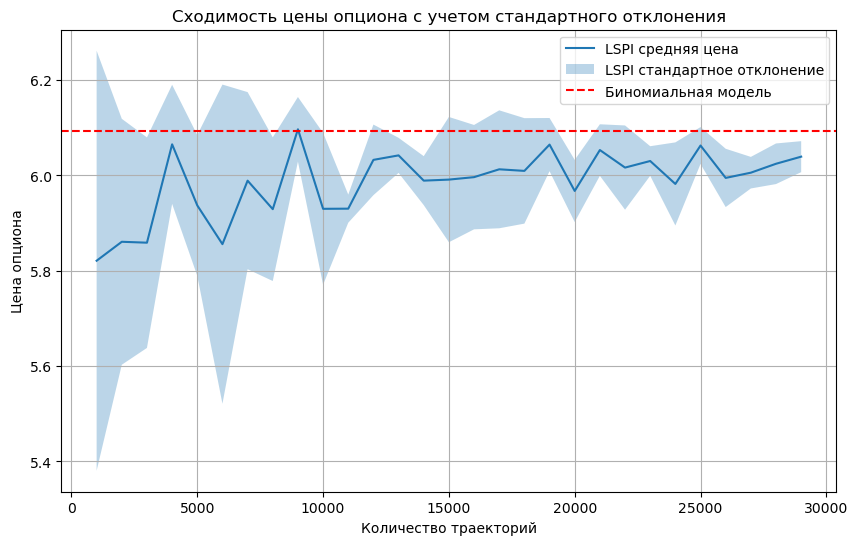

In [7]:
cnt_traj_list = list(range(1000, 30_000, 1000))
num_repeats = 5

mean_prices, std_prices = evaluate_pricer_with_std(
    sampler_class=GeometricBrownianMotionPutSampler,
    pricer_class=LSPIPricer,
    cnt_traj_list=cnt_traj_list,
    num_repeats=num_repeats,
    **option_params
)

plot_prices_with_std(cnt_traj_list, mean_prices, std_prices, label='LSPI', reference_price=binomial_price)

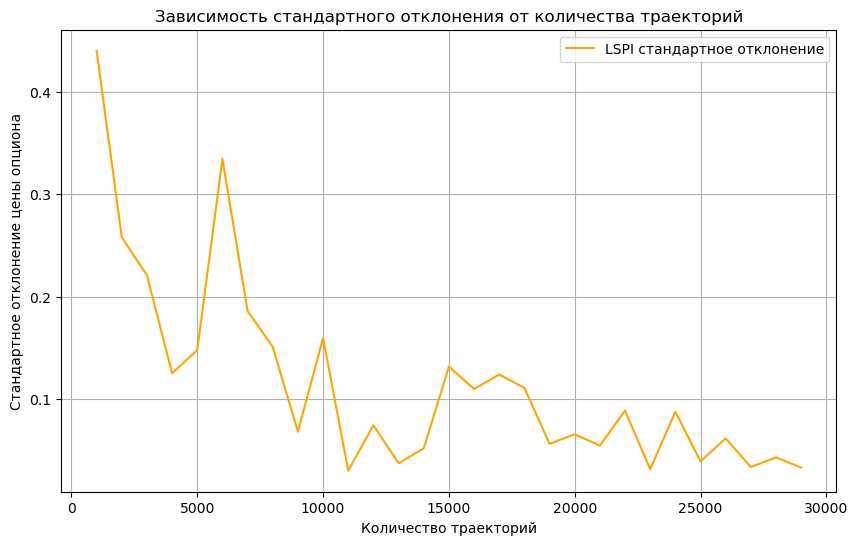

In [8]:
plot_std_only(cnt_traj_list, std_prices)

# протестируем для многомерного (rainbow) случая

In [12]:
rainbow_option_params = {
    "sigmas": [0.2, 0.25],
    "asset0": [100.0, 100.0], 
    "strike": 110.0,
    "r": 0.05,
    "t": 1.0,
    "cnt_times": 365,
    "seed": None
}

In [8]:
reference_params = rainbow_option_params.copy()
reference_params["cnt_trajectories"] = 100_000
reference_sampler = WienerRainbowPutOptionSampler(**reference_params)
reference_pricer = AmericanMonteCarloPricer(sampler=reference_sampler)
reference_price_history = reference_pricer.price(quiet=True)
reference_price = reference_pricer.result["train"]["price"]
print(f"Эталонная цена (AMC): {reference_price}")

WienerRainbow sampling with asset0:   0%|          | 0/100000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/100000 [00:00<?, ?it/s]

AMC price train:   0%|          | 0/364 [00:00<?, ?it/s]

Эталонная цена (AMC): 20.58784066146213


In [16]:
cnt_traj_list = list(range(1000, 30_000, 1000))
num_repeats = 5

mean_prices_rainbow, std_prices_rainbow = evaluate_pricer_with_std(
    sampler_class=WienerRainbowPutOptionSampler,
    pricer_class=LSPIPricer,
    cnt_traj_list=cnt_traj_list,
    num_repeats=num_repeats,
    **rainbow_option_params
)

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 121.3648
на 1-ой итерации норма разности весов составила 693.4248
на 2-ой итерации норма разности весов составила 603.0154
на 3-ой итерации норма разности весов составила 147.1998
на 4-ой итерации норма разности весов составила 45.5251
на 5-ой итерации норма разности весов составила 17.0646
на 6-ой итерации норма разности весов составила 2.8333
на 7-ой итерации норма разности весов составила 0.6054
на 8-ой итерации норма разности весов составила 0.3511
на 9-ой итерации норма разности весов составила 0.0076
на 10-ой итерации норма разности весов составила 0.0001
на 11-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.3813
на 1-ой итерации норма разности весов составила 8.1589
на 2-ой итерации норма разности весов составила 0.4075
на 3-ой итерации норма разности весов составила 0.6893
на 4-ой итерации норма разности весов составила 0.0952
на 5-ой итерации норма разности весов составила 0.001
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.6234
на 1-ой итерации норма разности весов составила 1.9409
на 2-ой итерации норма разности весов составила 0.3985
на 3-ой итерации норма разности весов составила 0.0963
на 4-ой итерации норма разности весов составила 0.0009
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.2808
на 1-ой итерации норма разности весов составила 3.3106
на 2-ой итерации норма разности весов составила 0.9517
на 3-ой итерации норма разности весов составила 0.1169
на 4-ой итерации норма разности весов составила 0.0007
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.4755
на 1-ой итерации норма разности весов составила 0.2667
на 2-ой итерации норма разности весов составила 0.2058
на 3-ой итерации норма разности весов составила 0.0099
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

cnt_traj: 1000, mean_price: 20.28097858886931, std_price: 0.2347443341109363


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 149.249
на 1-ой итерации норма разности весов составила 901.6112
на 2-ой итерации норма разности весов составила 456.472
на 3-ой итерации норма разности весов составила 505.9829
на 4-ой итерации норма разности весов составила 97.0756
на 5-ой итерации норма разности весов составила 20.4869
на 6-ой итерации норма разности весов составила 10.8899
на 7-ой итерации норма разности весов составила 3.7713
на 8-ой итерации норма разности весов составила 3.4159
на 9-ой итерации норма разности весов составила 1.038
на 10-ой итерации норма разности весов составила 0.298
на 11-ой итерации норма разности весов составила 0.0
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 30.4652
на 1-ой итерации норма разности весов составила 5.0326
на 2-ой итерации норма разности весов составила 5.1341
на 3-ой итерации норма разности весов составила 0.455
на 4-ой итерации норма разности весов составила 0.0214
на 5-ой итерации норма разности весов составила 0.001
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.0823
на 1-ой итерации норма разности весов составила 0.6719
на 2-ой итерации норма разности весов составила 0.314
на 3-ой итерации норма разности весов составила 0.0012
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.1229
на 1-ой итерации норма разности весов составила 0.8189
на 2-ой итерации норма разности весов составила 1.0217
на 3-ой итерации норма разности весов составила 0.0182
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.8758
на 1-ой итерации норма разности весов составила 1.7995
на 2-ой итерации норма разности весов составила 0.4212
на 3-ой итерации норма разности весов составила 0.0005
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

cnt_traj: 2000, mean_price: 20.448594088478885, std_price: 0.18575011043291048


WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 195.1804
на 1-ой итерации норма разности весов составила 823.8981
на 2-ой итерации норма разности весов составила 371.5098
на 3-ой итерации норма разности весов составила 548.3226
на 4-ой итерации норма разности весов составила 61.2552
на 5-ой итерации норма разности весов составила 21.2803
на 6-ой итерации норма разности весов составила 4.7752
на 7-ой итерации норма разности весов составила 0.6056
на 8-ой итерации норма разности весов составила 3.1908
на 9-ой итерации норма разности весов составила 0.3498
на 10-ой итерации норма разности весов составила 0.0011
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.7963
на 1-ой итерации норма разности весов составила 1.8534
на 2-ой итерации норма разности весов составила 0.262
на 3-ой итерации норма разности весов составила 0.0022
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.5351
на 1-ой итерации норма разности весов составила 0.4551
на 2-ой итерации норма разности весов составила 1.1396
на 3-ой итерации норма разности весов составила 0.2408
на 4-ой итерации норма разности весов составила 0.0031
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.1846
на 1-ой итерации норма разности весов составила 1.2588
на 2-ой итерации норма разности весов составила 1.8949
на 3-ой итерации норма разности весов составила 0.8069
на 4-ой итерации норма разности весов составила 0.0449
на 5-ой итерации норма разности весов составила 0.0018
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 16.9614
на 1-ой итерации норма разности весов составила 4.3597
на 2-ой итерации норма разности весов составила 1.1607
на 3-ой итерации норма разности весов составила 0.5779
на 4-ой итерации норма разности весов составила 0.019
на 5-ой итерации норма разности весов составила 0.0005
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/3000 [00:00<?, ?it/s]

cnt_traj: 3000, mean_price: 20.46256494791978, std_price: 0.09478079387894425


WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 217.2035
на 1-ой итерации норма разности весов составила 961.7105
на 2-ой итерации норма разности весов составила 368.2715
на 3-ой итерации норма разности весов составила 683.3373
на 4-ой итерации норма разности весов составила 89.6777
на 5-ой итерации норма разности весов составила 20.9924
на 6-ой итерации норма разности весов составила 8.1181
на 7-ой итерации норма разности весов составила 0.6581
на 8-ой итерации норма разности весов составила 5.1363
на 9-ой итерации норма разности весов составила 1.2062
на 10-ой итерации норма разности весов составила 0.0831
на 11-ой итерации норма разности весов составила 0.0039
на 12-ой итерации норма разности весов составила 0.0003
на 13-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.2205
на 1-ой итерации норма разности весов составила 1.2269
на 2-ой итерации норма разности весов составила 3.2316
на 3-ой итерации норма разности весов составила 0.3163
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.702
на 1-ой итерации норма разности весов составила 4.5807
на 2-ой итерации норма разности весов составила 1.1865
на 3-ой итерации норма разности весов составила 0.0598
на 4-ой итерации норма разности весов составила 0.0019
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.5657
на 1-ой итерации норма разности весов составила 2.2071
на 2-ой итерации норма разности весов составила 0.3661
на 3-ой итерации норма разности весов составила 0.004
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.7937
на 1-ой итерации норма разности весов составила 4.6419
на 2-ой итерации норма разности весов составила 1.2002
на 3-ой итерации норма разности весов составила 0.0655
на 4-ой итерации норма разности весов составила 0.0014
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/4000 [00:00<?, ?it/s]

cnt_traj: 4000, mean_price: 20.50197804274861, std_price: 0.13076123037415482


WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 212.0373
на 1-ой итерации норма разности весов составила 971.2639
на 2-ой итерации норма разности весов составила 337.8849
на 3-ой итерации норма разности весов составила 702.7709
на 4-ой итерации норма разности весов составила 105.7944
на 5-ой итерации норма разности весов составила 21.5846
на 6-ой итерации норма разности весов составила 10.7985
на 7-ой итерации норма разности весов составила 0.5364
на 8-ой итерации норма разности весов составила 4.7665
на 9-ой итерации норма разности весов составила 0.5095
на 10-ой итерации норма разности весов составила 0.0026
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.4945
на 1-ой итерации норма разности весов составила 0.2837
на 2-ой итерации норма разности весов составила 2.9964
на 3-ой итерации норма разности весов составила 0.7696
на 4-ой итерации норма разности весов составила 0.0204
на 5-ой итерации норма разности весов составила 0.0011
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.8979
на 1-ой итерации норма разности весов составила 0.4399
на 2-ой итерации норма разности весов составила 0.0347
на 3-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 23.2701
на 1-ой итерации норма разности весов составила 4.6901
на 2-ой итерации норма разности весов составила 1.4322
на 3-ой итерации норма разности весов составила 0.1046
на 4-ой итерации норма разности весов составила 0.002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.6743
на 1-ой итерации норма разности весов составила 2.0384
на 2-ой итерации норма разности весов составила 0.1451
на 3-ой итерации норма разности весов составила 0.0031
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/5000 [00:00<?, ?it/s]

cnt_traj: 5000, mean_price: 20.521488253263207, std_price: 0.09640378792661478


WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 215.0295
на 1-ой итерации норма разности весов составила 946.6336
на 2-ой итерации норма разности весов составила 280.6373
на 3-ой итерации норма разности весов составила 564.5748
на 4-ой итерации норма разности весов составила 303.4904
на 5-ой итерации норма разности весов составила 40.7076
на 6-ой итерации норма разности весов составила 14.8612
на 7-ой итерации норма разности весов составила 3.3593
на 8-ой итерации норма разности весов составила 8.7109
на 9-ой итерации норма разности весов составила 5.5729
на 10-ой итерации норма разности весов составила 0.0088
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 15.1765
на 1-ой итерации норма разности весов составила 3.388
на 2-ой итерации норма разности весов составила 0.5794
на 3-ой итерации норма разности весов составила 0.0014
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.7518
на 1-ой итерации норма разности весов составила 3.0743
на 2-ой итерации норма разности весов составила 1.8494
на 3-ой итерации норма разности весов составила 0.2534
на 4-ой итерации норма разности весов составила 0.0049
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 35.9607
на 1-ой итерации норма разности весов составила 10.568
на 2-ой итерации норма разности весов составила 2.4299
на 3-ой итерации норма разности весов составила 0.106
на 4-ой итерации норма разности весов составила 0.0029
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 33.1386
на 1-ой итерации норма разности весов составила 3.4373
на 2-ой итерации норма разности весов составила 0.7958
на 3-ой итерации норма разности весов составила 0.0081
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/6000 [00:00<?, ?it/s]

cnt_traj: 6000, mean_price: 20.511396383623797, std_price: 0.10585067728350571


WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 245.6907
на 1-ой итерации норма разности весов составила 953.7657
на 2-ой итерации норма разности весов составила 288.1022
на 3-ой итерации норма разности весов составила 596.619
на 4-ой итерации норма разности весов составила 280.4464
на 5-ой итерации норма разности весов составила 33.6709
на 6-ой итерации норма разности весов составила 5.9296
на 7-ой итерации норма разности весов составила 2.5492
на 8-ой итерации норма разности весов составила 10.6764
на 9-ой итерации норма разности весов составила 4.7443
на 10-ой итерации норма разности весов составила 0.9067
на 11-ой итерации норма разности весов составила 0.0004
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.7463
на 1-ой итерации норма разности весов составила 3.4952
на 2-ой итерации норма разности весов составила 0.4031
на 3-ой итерации норма разности весов составила 0.0046
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 0.9514
на 1-ой итерации норма разности весов составила 0.3192
на 2-ой итерации норма разности весов составила 0.0029
на 3-ой итерации норма разности весов составила 0.0001
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.9317
на 1-ой итерации норма разности весов составила 3.3263
на 2-ой итерации норма разности весов составила 0.8589
на 3-ой итерации норма разности весов составила 0.0159
на 4-ой итерации норма разности весов составила 0.0008
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0
на 8-ой итерации норма разности весов составила 0.0
на 9-ой итерации норма разности весов составила 0.0
на 10-ой итерации норма разности весов составила 0.0
на 11-ой итерации норма разности весов составила 0.0
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0
на 15-ой итерации норма разности весов составила 0.0
на 16-ой итерации норма разности весов составила 0.0
на 17-ой итерации норма разности весов составила 0.0
на 18-ой итерации норма разности весов с

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.1332
на 1-ой итерации норма разности весов составила 0.2665
на 2-ой итерации норма разности весов составила 0.2644
на 3-ой итерации норма разности весов составила 0.004
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/7000 [00:00<?, ?it/s]

cnt_traj: 7000, mean_price: 20.52353712351195, std_price: 0.1209478229121111


WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 227.4807
на 1-ой итерации норма разности весов составила 956.5678
на 2-ой итерации норма разности весов составила 266.1313
на 3-ой итерации норма разности весов составила 489.8169
на 4-ой итерации норма разности весов составила 442.4195
на 5-ой итерации норма разности весов составила 75.1555
на 6-ой итерации норма разности весов составила 22.1577
на 7-ой итерации норма разности весов составила 0.4718
на 8-ой итерации норма разности весов составила 7.7067
на 9-ой итерации норма разности весов составила 2.0417
на 10-ой итерации норма разности весов составила 0.0025
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.4252
на 1-ой итерации норма разности весов составила 3.7576
на 2-ой итерации норма разности весов составила 0.5193
на 3-ой итерации норма разности весов составила 0.0027
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 16.3526
на 1-ой итерации норма разности весов составила 1.2952
на 2-ой итерации норма разности весов составила 0.1857
на 3-ой итерации норма разности весов составила 0.0058
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 20.554
на 1-ой итерации норма разности весов составила 0.5139
на 2-ой итерации норма разности весов составила 0.3843
на 3-ой итерации норма разности весов составила 0.0043
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 43.6378
на 1-ой итерации норма разности весов составила 6.9428
на 2-ой итерации норма разности весов составила 1.6159
на 3-ой итерации норма разности весов составила 0.1643
на 4-ой итерации норма разности весов составила 0.0053
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/8000 [00:00<?, ?it/s]

cnt_traj: 8000, mean_price: 20.601382214253665, std_price: 0.09576577018301939


WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 246.7003
на 1-ой итерации норма разности весов составила 959.3904
на 2-ой итерации норма разности весов составила 265.2666
на 3-ой итерации норма разности весов составила 496.0773
на 4-ой итерации норма разности весов составила 441.8773
на 5-ой итерации норма разности весов составила 54.8271
на 6-ой итерации норма разности весов составила 26.4561
на 7-ой итерации норма разности весов составила 4.9401
на 8-ой итерации норма разности весов составила 9.3782
на 9-ой итерации норма разности весов составила 2.2863
на 10-ой итерации норма разности весов составила 0.0513
на 11-ой итерации норма разности весов составила 0.0004
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.2922
на 1-ой итерации норма разности весов составила 0.626
на 2-ой итерации норма разности весов составила 0.0036
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 25.6822
на 1-ой итерации норма разности весов составила 3.2897
на 2-ой итерации норма разности весов составила 0.8536
на 3-ой итерации норма разности весов составила 0.0109
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.0017
на 1-ой итерации норма разности весов составила 10.3686
на 2-ой итерации норма разности весов составила 1.972
на 3-ой итерации норма разности весов составила 0.0979
на 4-ой итерации норма разности весов составила 0.0028
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.9793
на 1-ой итерации норма разности весов составила 1.1557
на 2-ой итерации норма разности весов составила 0.8115
на 3-ой итерации норма разности весов составила 0.0066
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/9000 [00:00<?, ?it/s]

cnt_traj: 9000, mean_price: 20.478851641790186, std_price: 0.10962941724981225


WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 270.2284
на 1-ой итерации норма разности весов составила 835.7024
на 2-ой итерации норма разности весов составила 206.756
на 3-ой итерации норма разности весов составила 508.5414
на 4-ой итерации норма разности весов составила 376.5926
на 5-ой итерации норма разности весов составила 49.9393
на 6-ой итерации норма разности весов составила 12.3378
на 7-ой итерации норма разности весов составила 1.2708
на 8-ой итерации норма разности весов составила 13.1525
на 9-ой итерации норма разности весов составила 5.82
на 10-ой итерации норма разности весов составила 1.2785
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.8714
на 1-ой итерации норма разности весов составила 2.0021
на 2-ой итерации норма разности весов составила 0.382
на 3-ой итерации норма разности весов составила 0.0126
на 4-ой итерации норма разности весов составила 0.0008
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0
на 8-ой итерации норма разности весов составила 0.0
на 9-ой итерации норма разности весов составила 0.0
на 10-ой итерации норма разности весов составила 0.0
на 11-ой итерации норма разности весов составила 0.0
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0
на 15-ой итерации норма разности весов составила 0.0
на 16-ой итерации норма разности весов составила 0.0
на 17-ой итерации норма разности весов составила 0.0
на 18-ой итерации норма разности вес

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.4093
на 1-ой итерации норма разности весов составила 0.3835
на 2-ой итерации норма разности весов составила 0.0069
на 3-ой итерации норма разности весов составила 0.0002
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.7476
на 1-ой итерации норма разности весов составила 0.554
на 2-ой итерации норма разности весов составила 0.0814
на 3-ой итерации норма разности весов составила 0.0015
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 19.9102
на 1-ой итерации норма разности весов составила 1.7647
на 2-ой итерации норма разности весов составила 0.0045
на 3-ой итерации норма разности весов составила 0.0003
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/10000 [00:00<?, ?it/s]

cnt_traj: 10000, mean_price: 20.536855918719667, std_price: 0.07154381675678292


WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 265.9678
на 1-ой итерации норма разности весов составила 1012.9016
на 2-ой итерации норма разности весов составила 299.9494
на 3-ой итерации норма разности весов составила 468.3738
на 4-ой итерации норма разности весов составила 537.5665
на 5-ой итерации норма разности весов составила 71.8631
на 6-ой итерации норма разности весов составила 46.8846
на 7-ой итерации норма разности весов составила 1.14
на 8-ой итерации норма разности весов составила 9.4904
на 9-ой итерации норма разности весов составила 3.6963
на 10-ой итерации норма разности весов составила 0.0329
на 11-ой итерации норма разности весов составила 0.0004
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.8681
на 1-ой итерации норма разности весов составила 0.2008
на 2-ой итерации норма разности весов составила 0.0313
на 3-ой итерации норма разности весов составила 0.0008
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.3409
на 1-ой итерации норма разности весов составила 2.0573
на 2-ой итерации норма разности весов составила 0.1225
на 3-ой итерации норма разности весов составила 0.0039
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 19.0242
на 1-ой итерации норма разности весов составила 5.3152
на 2-ой итерации норма разности весов составила 1.6978
на 3-ой итерации норма разности весов составила 0.102
на 4-ой итерации норма разности весов составила 0.0035
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 21.1563
на 1-ой итерации норма разности весов составила 1.4283
на 2-ой итерации норма разности весов составила 1.5669
на 3-ой итерации норма разности весов составила 0.0954
на 4-ой итерации норма разности весов составила 0.0039
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/11000 [00:00<?, ?it/s]

cnt_traj: 11000, mean_price: 20.5098669714261, std_price: 0.07594314557603715


WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 291.5982
на 1-ой итерации норма разности весов составила 889.2854
на 2-ой итерации норма разности весов составила 219.5346
на 3-ой итерации норма разности весов составила 516.9276
на 4-ой итерации норма разности весов составила 448.9346
на 5-ой итерации норма разности весов составила 65.9366
на 6-ой итерации норма разности весов составила 24.8438
на 7-ой итерации норма разности весов составила 5.3155
на 8-ой итерации норма разности весов составила 13.7756
на 9-ой итерации норма разности весов составила 3.6182
на 10-ой итерации норма разности весов составила 0.0549
на 11-ой итерации норма разности весов составила 0.0007
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.8776
на 1-ой итерации норма разности весов составила 0.6571
на 2-ой итерации норма разности весов составила 2.8229
на 3-ой итерации норма разности весов составила 0.4572
на 4-ой итерации норма разности весов составила 0.0071
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.0332
на 1-ой итерации норма разности весов составила 0.3106
на 2-ой итерации норма разности весов составила 0.0089
на 3-ой итерации норма разности весов составила 0.0005
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.7882
на 1-ой итерации норма разности весов составила 2.3962
на 2-ой итерации норма разности весов составила 0.7635
на 3-ой итерации норма разности весов составила 0.0016
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 0.5411
на 1-ой итерации норма разности весов составила 1.3645
на 2-ой итерации норма разности весов составила 0.1424
на 3-ой итерации норма разности весов составила 0.0059
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/12000 [00:00<?, ?it/s]

cnt_traj: 12000, mean_price: 20.476649600529083, std_price: 0.10273625744128496


WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 257.8793
на 1-ой итерации норма разности весов составила 1011.8374
на 2-ой итерации норма разности весов составила 267.2775
на 3-ой итерации норма разности весов составила 490.0786
на 4-ой итерации норма разности весов составила 542.4377
на 5-ой итерации норма разности весов составила 81.8274
на 6-ой итерации норма разности весов составила 42.3297
на 7-ой итерации норма разности весов составила 1.7529
на 8-ой итерации норма разности весов составила 11.8255
на 9-ой итерации норма разности весов составила 5.3809
на 10-ой итерации норма разности весов составила 0.2249
на 11-ой итерации норма разности весов составила 0.0089
на 12-ой итерации норма разности весов составила 0.0005
на 13-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.4115
на 1-ой итерации норма разности весов составила 0.6295
на 2-ой итерации норма разности весов составила 0.0113
на 3-ой итерации норма разности весов составила 0.0008
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 0.7553
на 1-ой итерации норма разности весов составила 1.7956
на 2-ой итерации норма разности весов составила 0.4782
на 3-ой итерации норма разности весов составила 0.0113
на 4-ой итерации норма разности весов составила 0.0007
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.2804
на 1-ой итерации норма разности весов составила 3.7261
на 2-ой итерации норма разности весов составила 0.5291
на 3-ой итерации норма разности весов составила 0.0094
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.8415
на 1-ой итерации норма разности весов составила 3.41
на 2-ой итерации норма разности весов составила 0.7964
на 3-ой итерации норма разности весов составила 0.0045
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/13000 [00:00<?, ?it/s]

cnt_traj: 13000, mean_price: 20.5489054002768, std_price: 0.0808905982092646


WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 268.447
на 1-ой итерации норма разности весов составила 901.5866
на 2-ой итерации норма разности весов составила 196.616
на 3-ой итерации норма разности весов составила 477.9821
на 4-ой итерации норма разности весов составила 470.2439
на 5-ой итерации норма разности весов составила 42.6205
на 6-ой итерации норма разности весов составила 36.35
на 7-ой итерации норма разности весов составила 5.611
на 8-ой итерации норма разности весов составила 12.1228
на 9-ой итерации норма разности весов составила 5.0115
на 10-ой итерации норма разности весов составила 0.0288
на 11-ой итерации норма разности весов составила 0.0007
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 15.4193
на 1-ой итерации норма разности весов составила 0.8821
на 2-ой итерации норма разности весов составила 1.6912
на 3-ой итерации норма разности весов составила 0.093
на 4-ой итерации норма разности весов составила 0.0032
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 22.141
на 1-ой итерации норма разности весов составила 1.0092
на 2-ой итерации норма разности весов составила 0.2278
на 3-ой итерации норма разности весов составила 0.0117
на 4-ой итерации норма разности весов составила 0.0007
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.877
на 1-ой итерации норма разности весов составила 5.7682
на 2-ой итерации норма разности весов составила 1.4325
на 3-ой итерации норма разности весов составила 0.0397
на 4-ой итерации норма разности весов составила 0.0012
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.2406
на 1-ой итерации норма разности весов составила 0.831
на 2-ой итерации норма разности весов составила 0.3977
на 3-ой итерации норма разности весов составила 0.0113
на 4-ой итерации норма разности весов составила 0.0006
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/14000 [00:00<?, ?it/s]

cnt_traj: 14000, mean_price: 20.655490855298137, std_price: 0.059604376917096864


WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 277.1738
на 1-ой итерации норма разности весов составила 965.7571
на 2-ой итерации норма разности весов составила 240.7432
на 3-ой итерации норма разности весов составила 470.7632
на 4-ой итерации норма разности весов составила 524.4123
на 5-ой итерации норма разности весов составила 56.079
на 6-ой итерации норма разности весов составила 47.7211
на 7-ой итерации норма разности весов составила 1.7786
на 8-ой итерации норма разности весов составила 14.3292
на 9-ой итерации норма разности весов составила 8.5243
на 10-ой итерации норма разности весов составила 1.0338
на 11-ой итерации норма разности весов составила 0.0085
на 12-ой итерации норма разности весов составила 0.0007
на 13-ой итерации норма разности весов составила 0.0001
на 14-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.9308
на 1-ой итерации норма разности весов составила 12.6114
на 2-ой итерации норма разности весов составила 3.0399
на 3-ой итерации норма разности весов составила 0.2122
на 4-ой итерации норма разности весов составила 0.0046
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 25.5262
на 1-ой итерации норма разности весов составила 5.8273
на 2-ой итерации норма разности весов составила 3.2956
на 3-ой итерации норма разности весов составила 0.2137
на 4-ой итерации норма разности весов составила 0.0074
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.375
на 1-ой итерации норма разности весов составила 5.2417
на 2-ой итерации норма разности весов составила 1.2568
на 3-ой итерации норма разности весов составила 0.0138
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.8996
на 1-ой итерации норма разности весов составила 2.6004
на 2-ой итерации норма разности весов составила 2.9904
на 3-ой итерации норма разности весов составила 0.4867
на 4-ой итерации норма разности весов составила 0.019
на 5-ой итерации норма разности весов составила 0.0014
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/15000 [00:00<?, ?it/s]

cnt_traj: 15000, mean_price: 20.528674568047304, std_price: 0.07584769483350562


WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 269.0489
на 1-ой итерации норма разности весов составила 964.4801
на 2-ой итерации норма разности весов составила 232.5852
на 3-ой итерации норма разности весов составила 472.4055
на 4-ой итерации норма разности весов составила 498.3795
на 5-ой итерации норма разности весов составила 36.8977
на 6-ой итерации норма разности весов составила 45.3595
на 7-ой итерации норма разности весов составила 2.9181
на 8-ой итерации норма разности весов составила 16.3945
на 9-ой итерации норма разности весов составила 7.6805
на 10-ой итерации норма разности весов составила 0.4132
на 11-ой итерации норма разности весов составила 0.0149
на 12-ой итерации норма разности весов составила 0.0011
на 13-ой итерации норма разности весов составила 0.0001
на 14-ой итерации норма разности весов составила 0.0
на 15-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 26.2052
на 1-ой итерации норма разности весов составила 3.4048
на 2-ой итерации норма разности весов составила 0.6911
на 3-ой итерации норма разности весов составила 0.0089
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0
на 8-ой итерации норма разности весов составила 0.0
на 9-ой итерации норма разности весов составила 0.0
на 10-ой итерации норма разности весов составила 0.0
на 11-ой итерации норма разности весов составила 0.0
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0
на 15-ой итерации норма разности весов составила 0.0
на 16-ой итерации норма разности весов составила 0.0
на 17-ой итерации норма разности весов составила 0.0
на 18-ой итерации норма разности весов с

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.2133
на 1-ой итерации норма разности весов составила 5.2343
на 2-ой итерации норма разности весов составила 1.0719
на 3-ой итерации норма разности весов составила 0.0024
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.9545
на 1-ой итерации норма разности весов составила 2.4064
на 2-ой итерации норма разности весов составила 0.194
на 3-ой итерации норма разности весов составила 0.0107
на 4-ой итерации норма разности весов составила 0.0006
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.8075
на 1-ой итерации норма разности весов составила 1.5937
на 2-ой итерации норма разности весов составила 0.0389
на 3-ой итерации норма разности весов составила 0.0017
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/16000 [00:00<?, ?it/s]

cnt_traj: 16000, mean_price: 20.535519951773416, std_price: 0.09352383689651572


WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 291.9461
на 1-ой итерации норма разности весов составила 857.4979
на 2-ой итерации норма разности весов составила 177.5393
на 3-ой итерации норма разности весов составила 479.8612
на 4-ой итерации норма разности весов составила 439.3931
на 5-ой итерации норма разности весов составила 35.0666
на 6-ой итерации норма разности весов составила 18.2577
на 7-ой итерации норма разности весов составила 2.2869
на 8-ой итерации норма разности весов составила 19.2825
на 9-ой итерации норма разности весов составила 5.2881
на 10-ой итерации норма разности весов составила 0.1171
на 11-ой итерации норма разности весов составила 0.0035
на 12-ой итерации норма разности весов составила 0.0002
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.9269
на 1-ой итерации норма разности весов составила 7.6661
на 2-ой итерации норма разности весов составила 1.261
на 3-ой итерации норма разности весов составила 0.0109
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 16.7343
на 1-ой итерации норма разности весов составила 3.6852
на 2-ой итерации норма разности весов составила 1.7852
на 3-ой итерации норма разности весов составила 0.0997
на 4-ой итерации норма разности весов составила 0.0057
на 5-ой итерации норма разности весов составила 0.0003
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.5727
на 1-ой итерации норма разности весов составила 8.9507
на 2-ой итерации норма разности весов составила 1.7237
на 3-ой итерации норма разности весов составила 0.0418
на 4-ой итерации норма разности весов составила 0.0017
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 35.1181
на 1-ой итерации норма разности весов составила 5.5433
на 2-ой итерации норма разности весов составила 1.2967
на 3-ой итерации норма разности весов составила 0.0219
на 4-ой итерации норма разности весов составила 0.0013
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0
на 8-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/17000 [00:00<?, ?it/s]

cnt_traj: 17000, mean_price: 20.45898921325381, std_price: 0.11934325460179684


WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 275.1536
на 1-ой итерации норма разности весов составила 968.9316
на 2-ой итерации норма разности весов составила 230.783
на 3-ой итерации норма разности весов составила 473.3779
на 4-ой итерации норма разности весов составила 520.3864
на 5-ой итерации норма разности весов составила 36.294
на 6-ой итерации норма разности весов составила 56.0235
на 7-ой итерации норма разности весов составила 6.7897
на 8-ой итерации норма разности весов составила 19.9312
на 9-ой итерации норма разности весов составила 6.5633
на 10-ой итерации норма разности весов составила 0.3056
на 11-ой итерации норма разности весов составила 0.0081
на 12-ой итерации норма разности весов составила 0.0005
на 13-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.6014
на 1-ой итерации норма разности весов составила 1.9984
на 2-ой итерации норма разности весов составила 0.2316
на 3-ой итерации норма разности весов составила 0.0054
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.3045
на 1-ой итерации норма разности весов составила 1.5801
на 2-ой итерации норма разности весов составила 0.7537
на 3-ой итерации норма разности весов составила 0.0061
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 21.5579
на 1-ой итерации норма разности весов составила 2.9862
на 2-ой итерации норма разности весов составила 1.495
на 3-ой итерации норма разности весов составила 0.0443
на 4-ой итерации норма разности весов составила 0.0023
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.49
на 1-ой итерации норма разности весов составила 3.3364
на 2-ой итерации норма разности весов составила 0.5459
на 3-ой итерации норма разности весов составила 0.0188
на 4-ой итерации норма разности весов составила 0.0016
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/18000 [00:00<?, ?it/s]

cnt_traj: 18000, mean_price: 20.51973534234682, std_price: 0.0667073881120168


WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 284.7831
на 1-ой итерации норма разности весов составила 886.2947
на 2-ой итерации норма разности весов составила 178.5093
на 3-ой итерации норма разности весов составила 474.3726
на 4-ой итерации норма разности весов составила 442.8107
на 5-ой итерации норма разности весов составила 23.8958
на 6-ой итерации норма разности весов составила 34.7287
на 7-ой итерации норма разности весов составила 1.4882
на 8-ой итерации норма разности весов составила 18.6612
на 9-ой итерации норма разности весов составила 5.6746
на 10-ой итерации норма разности весов составила 0.2281
на 11-ой итерации норма разности весов составила 0.0076
на 12-ой итерации норма разности весов составила 0.0005
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.4427
на 1-ой итерации норма разности весов составила 0.3386
на 2-ой итерации норма разности весов составила 0.0106
на 3-ой итерации норма разности весов составила 0.0005
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.8516
на 1-ой итерации норма разности весов составила 0.8802
на 2-ой итерации норма разности весов составила 0.0149
на 3-ой итерации норма разности весов составила 0.0009
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 17.9005
на 1-ой итерации норма разности весов составила 0.0934
на 2-ой итерации норма разности весов составила 0.0082
на 3-ой итерации норма разности весов составила 0.0003
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 25.8046
на 1-ой итерации норма разности весов составила 16.3996
на 2-ой итерации норма разности весов составила 3.9972
на 3-ой итерации норма разности весов составила 0.27
на 4-ой итерации норма разности весов составила 0.0048
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/19000 [00:00<?, ?it/s]

cnt_traj: 19000, mean_price: 20.513085648285916, std_price: 0.05959755293479964


WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 297.6695
на 1-ой итерации норма разности весов составила 857.9708
на 2-ой итерации норма разности весов составила 166.5222
на 3-ой итерации норма разности весов составила 475.0158
на 4-ой итерации норма разности весов составила 432.8711
на 5-ой итерации норма разности весов составила 25.5802
на 6-ой итерации норма разности весов составила 33.8327
на 7-ой итерации норма разности весов составила 0.8586
на 8-ой итерации норма разности весов составила 17.492
на 9-ой итерации норма разности весов составила 7.7759
на 10-ой итерации норма разности весов составила 0.4451
на 11-ой итерации норма разности весов составила 0.0109
на 12-ой итерации норма разности весов составила 0.0006
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 22.451
на 1-ой итерации норма разности весов составила 2.8274
на 2-ой итерации норма разности весов составила 0.2001
на 3-ой итерации норма разности весов составила 0.0064
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.0662
на 1-ой итерации норма разности весов составила 0.8291
на 2-ой итерации норма разности весов составила 0.0126
на 3-ой итерации норма разности весов составила 0.0006
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.5049
на 1-ой итерации норма разности весов составила 4.3493
на 2-ой итерации норма разности весов составила 0.3635
на 3-ой итерации норма разности весов составила 0.009
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.5177
на 1-ой итерации норма разности весов составила 4.5757
на 2-ой итерации норма разности весов составила 0.7475
на 3-ой итерации норма разности весов составила 0.0121
на 4-ой итерации норма разности весов составила 0.001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/20000 [00:00<?, ?it/s]

cnt_traj: 20000, mean_price: 20.517910688776123, std_price: 0.0414533326610527


WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 296.1828
на 1-ой итерации норма разности весов составила 912.6992
на 2-ой итерации норма разности весов составила 202.9564
на 3-ой итерации норма разности весов составила 468.6325
на 4-ой итерации норма разности весов составила 465.4289
на 5-ой итерации норма разности весов составила 23.9979
на 6-ой итерации норма разности весов составила 43.1443
на 7-ой итерации норма разности весов составила 2.8967
на 8-ой итерации норма разности весов составила 18.2467
на 9-ой итерации норма разности весов составила 9.6262
на 10-ой итерации норма разности весов составила 0.3338
на 11-ой итерации норма разности весов составила 0.0065
на 12-ой итерации норма разности весов составила 0.0004
на 13-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.5971
на 1-ой итерации норма разности весов составила 2.4291
на 2-ой итерации норма разности весов составила 0.3122
на 3-ой итерации норма разности весов составила 0.0083
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.4369
на 1-ой итерации норма разности весов составила 4.3894
на 2-ой итерации норма разности весов составила 1.5158
на 3-ой итерации норма разности весов составила 0.0224
на 4-ой итерации норма разности весов составила 0.0006
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 23.6292
на 1-ой итерации норма разности весов составила 4.4451
на 2-ой итерации норма разности весов составила 1.699
на 3-ой итерации норма разности весов составила 0.0562
на 4-ой итерации норма разности весов составила 0.0028
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.2851
на 1-ой итерации норма разности весов составила 2.9401
на 2-ой итерации норма разности весов составила 0.9989
на 3-ой итерации норма разности весов составила 0.0021
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/21000 [00:00<?, ?it/s]

cnt_traj: 21000, mean_price: 20.473326886335755, std_price: 0.05704693010612139


WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 302.5239
на 1-ой итерации норма разности весов составила 907.9959
на 2-ой итерации норма разности весов составила 194.8644
на 3-ой итерации норма разности весов составила 482.4915
на 4-ой итерации норма разности весов составила 462.0198
на 5-ой итерации норма разности весов составила 24.3097
на 6-ой итерации норма разности весов составила 29.9848
на 7-ой итерации норма разности весов составила 1.5997
на 8-ой итерации норма разности весов составила 24.4452
на 9-ой итерации норма разности весов составила 5.3306
на 10-ой итерации норма разности весов составила 0.1654
на 11-ой итерации норма разности весов составила 0.005
на 12-ой итерации норма разности весов составила 0.0002
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.3428
на 1-ой итерации норма разности весов составила 3.5246
на 2-ой итерации норма разности весов составила 0.3554
на 3-ой итерации норма разности весов составила 0.0157
на 4-ой итерации норма разности весов составила 0.001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.0638
на 1-ой итерации норма разности весов составила 5.3466
на 2-ой итерации норма разности весов составила 1.3179
на 3-ой итерации норма разности весов составила 0.0096
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.7655
на 1-ой итерации норма разности весов составила 4.9773
на 2-ой итерации норма разности весов составила 1.178
на 3-ой итерации норма разности весов составила 0.0058
на 4-ой итерации норма разности весов составила 0.0007
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 24.1782
на 1-ой итерации норма разности весов составила 0.0908
на 2-ой итерации норма разности весов составила 0.0075
на 3-ой итерации норма разности весов составила 0.0003
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/22000 [00:00<?, ?it/s]

cnt_traj: 22000, mean_price: 20.504933427073315, std_price: 0.05956093585204753


WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 293.1347
на 1-ой итерации норма разности весов составила 961.0523
на 2-ой итерации норма разности весов составила 220.5202
на 3-ой итерации норма разности весов составила 474.189
на 4-ой итерации норма разности весов составила 483.0954
на 5-ой итерации норма разности весов составила 38.4258
на 6-ой итерации норма разности весов составила 63.1815
на 7-ой итерации норма разности весов составила 2.6113
на 8-ой итерации норма разности весов составила 22.9846
на 9-ой итерации норма разности весов составила 10.2505
на 10-ой итерации норма разности весов составила 0.8693
на 11-ой итерации норма разности весов составила 0.0183
на 12-ой итерации норма разности весов составила 0.001
на 13-ой итерации норма разности весов составила 0.0001
на 14-ой итерации норма разности весов составила 0.0
на 15-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 17.0173
на 1-ой итерации норма разности весов составила 5.0771
на 2-ой итерации норма разности весов составила 0.7183
на 3-ой итерации норма разности весов составила 0.0101
на 4-ой итерации норма разности весов составила 0.0006
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.7144
на 1-ой итерации норма разности весов составила 2.0581
на 2-ой итерации норма разности весов составила 0.5865
на 3-ой итерации норма разности весов составила 0.0103
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.8083
на 1-ой итерации норма разности весов составила 9.304
на 2-ой итерации норма разности весов составила 2.012
на 3-ой итерации норма разности весов составила 0.0516
на 4-ой итерации норма разности весов составила 0.0013
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.2558
на 1-ой итерации норма разности весов составила 3.4647
на 2-ой итерации норма разности весов составила 0.6229
на 3-ой итерации норма разности весов составила 0.0119
на 4-ой итерации норма разности весов составила 0.0005
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/23000 [00:00<?, ?it/s]

cnt_traj: 23000, mean_price: 20.544022087476797, std_price: 0.07659381160240358


WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 294.7186
на 1-ой итерации норма разности весов составила 982.6029
на 2-ой итерации норма разности весов составила 239.8053
на 3-ой итерации норма разности весов составила 467.607
на 4-ой итерации норма разности весов составила 502.5235
на 5-ой итерации норма разности весов составила 31.2324
на 6-ой итерации норма разности весов составила 60.6971
на 7-ой итерации норма разности весов составила 4.1915
на 8-ой итерации норма разности весов составила 24.2175
на 9-ой итерации норма разности весов составила 7.8651
на 10-ой итерации норма разности весов составила 0.2521
на 11-ой итерации норма разности весов составила 0.0098
на 12-ой итерации норма разности весов составила 0.0005
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.8257
на 1-ой итерации норма разности весов составила 5.6591
на 2-ой итерации норма разности весов составила 0.8163
на 3-ой итерации норма разности весов составила 0.0078
на 4-ой итерации норма разности весов составила 0.0007
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.8508
на 1-ой итерации норма разности весов составила 1.7132
на 2-ой итерации норма разности весов составила 0.0513
на 3-ой итерации норма разности весов составила 0.0031
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.2956
на 1-ой итерации норма разности весов составила 0.6871
на 2-ой итерации норма разности весов составила 0.0091
на 3-ой итерации норма разности весов составила 0.0003
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.1057
на 1-ой итерации норма разности весов составила 10.5994
на 2-ой итерации норма разности весов составила 2.1888
на 3-ой итерации норма разности весов составила 0.0575
на 4-ой итерации норма разности весов составила 0.0018
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/24000 [00:00<?, ?it/s]

cnt_traj: 24000, mean_price: 20.52235270639224, std_price: 0.06828383567791498


WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 275.9029
на 1-ой итерации норма разности весов составила 913.3199
на 2-ой итерации норма разности весов составила 208.3893
на 3-ой итерации норма разности весов составила 460.6334
на 4-ой итерации норма разности весов составила 478.7664
на 5-ой итерации норма разности весов составила 42.3661
на 6-ой итерации норма разности весов составила 33.2583
на 7-ой итерации норма разности весов составила 5.2548
на 8-ой итерации норма разности весов составила 23.5512
на 9-ой итерации норма разности весов составила 4.227
на 10-ой итерации норма разности весов составила 0.0341
на 11-ой итерации норма разности весов составила 0.0005
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.3699
на 1-ой итерации норма разности весов составила 4.3392
на 2-ой итерации норма разности весов составила 1.8107
на 3-ой итерации норма разности весов составила 0.0404
на 4-ой итерации норма разности весов составила 0.002
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.3192
на 1-ой итерации норма разности весов составила 4.8493
на 2-ой итерации норма разности весов составила 0.8657
на 3-ой итерации норма разности весов составила 0.0091
на 4-ой итерации норма разности весов составила 0.0005
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.5849
на 1-ой итерации норма разности весов составила 0.2844
на 2-ой итерации норма разности весов составила 0.0094
на 3-ой итерации норма разности весов составила 0.0006
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.2181
на 1-ой итерации норма разности весов составила 4.4085
на 2-ой итерации норма разности весов составила 0.5513
на 3-ой итерации норма разности весов составила 0.0169
на 4-ой итерации норма разности весов составила 0.0012
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/25000 [00:00<?, ?it/s]

cnt_traj: 25000, mean_price: 20.485940894005655, std_price: 0.042468441065378795


WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 300.9336
на 1-ой итерации норма разности весов составила 927.7851
на 2-ой итерации норма разности весов составила 199.6326
на 3-ой итерации норма разности весов составила 475.55
на 4-ой итерации норма разности весов составила 446.7591
на 5-ой итерации норма разности весов составила 38.3111
на 6-ой итерации норма разности весов составила 51.5272
на 7-ой итерации норма разности весов составила 1.6937
на 8-ой итерации норма разности весов составила 19.2109
на 9-ой итерации норма разности весов составила 11.4709
на 10-ой итерации норма разности весов составила 1.0471
на 11-ой итерации норма разности весов составила 0.019
на 12-ой итерации норма разности весов составила 0.0012
на 13-ой итерации норма разности весов составила 0.0001
на 14-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 24.3336
на 1-ой итерации норма разности весов составила 6.0426
на 2-ой итерации норма разности весов составила 1.1849
на 3-ой итерации норма разности весов составила 0.0041
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.8062
на 1-ой итерации норма разности весов составила 3.289
на 2-ой итерации норма разности весов составила 0.6757
на 3-ой итерации норма разности весов составила 0.0125
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 25.3864
на 1-ой итерации норма разности весов составила 6.7817
на 2-ой итерации норма разности весов составила 1.628
на 3-ой итерации норма разности весов составила 0.0249
на 4-ой итерации норма разности весов составила 0.0012
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 17.0806
на 1-ой итерации норма разности весов составила 2.2076
на 2-ой итерации норма разности весов составила 0.3963
на 3-ой итерации норма разности весов составила 0.0162
на 4-ой итерации норма разности весов составила 0.0011
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/26000 [00:00<?, ?it/s]

cnt_traj: 26000, mean_price: 20.530262403565178, std_price: 0.021767375362536322


WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 286.3819
на 1-ой итерации норма разности весов составила 982.6875
на 2-ой итерации норма разности весов составила 233.9832
на 3-ой итерации норма разности весов составила 466.5283
на 4-ой итерации норма разности весов составила 491.7568
на 5-ой итерации норма разности весов составила 25.0719
на 6-ой итерации норма разности весов составила 48.2538
на 7-ой итерации норма разности весов составила 3.5377
на 8-ой итерации норма разности весов составила 27.9002
на 9-ой итерации норма разности весов составила 4.156
на 10-ой итерации норма разности весов составила 0.0777
на 11-ой итерации норма разности весов составила 0.002
на 12-ой итерации норма разности весов составила 0.0001
на 13-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.5761
на 1-ой итерации норма разности весов составила 4.2435
на 2-ой итерации норма разности весов составила 0.7776
на 3-ой итерации норма разности весов составила 0.0226
на 4-ой итерации норма разности весов составила 0.0018
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.3669
на 1-ой итерации норма разности весов составила 7.5423
на 2-ой итерации норма разности весов составила 1.2514
на 3-ой итерации норма разности весов составила 0.0016
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.0343
на 1-ой итерации норма разности весов составила 5.7945
на 2-ой итерации норма разности весов составила 1.0964
на 3-ой итерации норма разности весов составила 0.0018
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.5397
на 1-ой итерации норма разности весов составила 5.4087
на 2-ой итерации норма разности весов составила 1.654
на 3-ой итерации норма разности весов составила 0.0204
на 4-ой итерации норма разности весов составила 0.0009
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/27000 [00:00<?, ?it/s]

cnt_traj: 27000, mean_price: 20.496259442436866, std_price: 0.06666454450065737


WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 321.9928
на 1-ой итерации норма разности весов составила 808.0797
на 2-ой итерации норма разности весов составила 137.0087
на 3-ой итерации норма разности весов составила 473.3705
на 4-ой итерации норма разности весов составила 407.9359
на 5-ой итерации норма разности весов составила 21.7416
на 6-ой итерации норма разности весов составила 6.7116
на 7-ой итерации норма разности весов составила 2.0213
на 8-ой итерации норма разности весов составила 26.5889
на 9-ой итерации норма разности весов составила 3.858
на 10-ой итерации норма разности весов составила 0.0604
на 11-ой итерации норма разности весов составила 0.0011
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.6159
на 1-ой итерации норма разности весов составила 0.0416
на 2-ой итерации норма разности весов составила 0.0022
на 3-ой итерации норма разности весов составила 0.0001
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.6831
на 1-ой итерации норма разности весов составила 0.0857
на 2-ой итерации норма разности весов составила 0.0034
на 3-ой итерации норма разности весов составила 0.0001
на 4-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.8562
на 1-ой итерации норма разности весов составила 0.6797
на 2-ой итерации норма разности весов составила 0.0114
на 3-ой итерации норма разности весов составила 0.0006
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.2949
на 1-ой итерации норма разности весов составила 1.7386
на 2-ой итерации норма разности весов составила 3.0166
на 3-ой итерации норма разности весов составила 0.2576
на 4-ой итерации норма разности весов составила 0.0093
на 5-ой итерации норма разности весов составила 0.0005
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/28000 [00:00<?, ?it/s]

cnt_traj: 28000, mean_price: 20.523790059785565, std_price: 0.04962795434853328


WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 304.3707
на 1-ой итерации норма разности весов составила 866.0458
на 2-ой итерации норма разности весов составила 165.9483
на 3-ой итерации норма разности весов составила 475.496
на 4-ой итерации норма разности весов составила 427.9731
на 5-ой итерации норма разности весов составила 35.5476
на 6-ой итерации норма разности весов составила 33.6477
на 7-ой итерации норма разности весов составила 3.9876
на 8-ой итерации норма разности весов составила 28.3767
на 9-ой итерации норма разности весов составила 4.842
на 10-ой итерации норма разности весов составила 0.1493
на 11-ой итерации норма разности весов составила 0.0052
на 12-ой итерации норма разности весов составила 0.0002
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.3465
на 1-ой итерации норма разности весов составила 4.2639
на 2-ой итерации норма разности весов составила 0.3765
на 3-ой итерации норма разности весов составила 0.0092
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.7874
на 1-ой итерации норма разности весов составила 3.4618
на 2-ой итерации норма разности весов составила 0.4663
на 3-ой итерации норма разности весов составила 0.0134
на 4-ой итерации норма разности весов составила 0.0007
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.2324
на 1-ой итерации норма разности весов составила 2.154
на 2-ой итерации норма разности весов составила 0.2181
на 3-ой итерации норма разности весов составила 0.0094
на 4-ой итерации норма разности весов составила 0.0005
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.5272
на 1-ой итерации норма разности весов составила 3.2295
на 2-ой итерации норма разности весов составила 0.2236
на 3-ой итерации норма разности весов составила 0.0087
на 4-ой итерации норма разности весов составила 0.0005
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/29000 [00:00<?, ?it/s]

cnt_traj: 29000, mean_price: 20.57306939074737, std_price: 0.09072451911317883


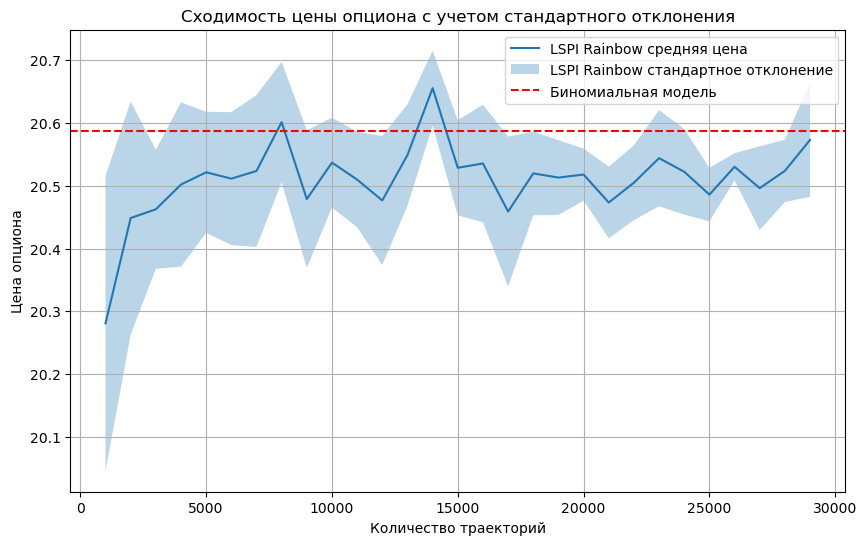

In [17]:
plot_prices_with_std(cnt_traj_list, mean_prices_rainbow, std_prices_rainbow, 
                     label='LSPI Rainbow', reference_price=reference_price)

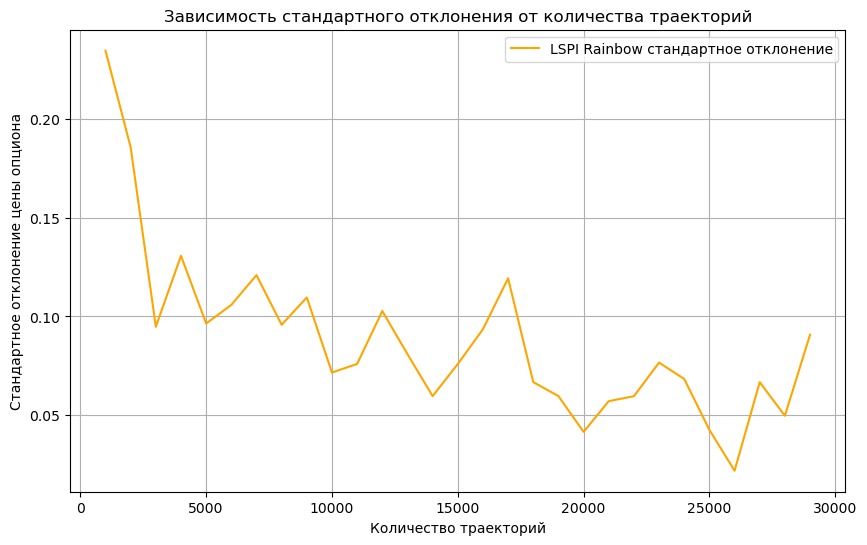

In [18]:
plot_std_only(cnt_traj_list, std_prices_rainbow, label='LSPI Rainbow')